# Matala 2
### Students: 
Eden Cohen                                   
Marina Nezhelsky
--- 

## Table of Contant

1. [Prepare The Current Dataset](#section1)
2. [Functions](#section2)
3. [Prepare The Train Set Data](#section3)
4. [Encoding  and  Correlation](#section4)
4. [Price Prediction by ElasticNet](#section5)
6. [Feature Importances](#section6)

---
<div>
<img src="https://github.com/MarinaNezhelsky/data-analysis/blob/main/ML%20Pic.png?raw=true" width="700"/>
</div>

---
<a id='section1'></a>
#  1. Prepare The Current Dataset

In this section we will explore the given Dataset, validate the data, handel with missing values and prepare the dataset to the model.

---

## Explore the data, remove duplicate and drop columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Dataset = pd.read_csv("dataset.csv")
Dataset.head()

,manufactor,Year,model,Hand,Gear,capacity_Engine,Engine_type,Prev_ownership,Curr_ownership,Area,City,Price,Pic_num,Cre_date,Repub_date,Description,Color,Km,Test,Supply_score
0,יונדאי,2015,i35,2,אוטומטית,1600,בנזין,פרטית,פרטית,רעננה - כפר סבא,רעננה,51000.0,2.0,11/07/2023,11/07/2023,['רכב שמור בקנאות\nמוכרת עקב קבלת רכב חברה'],כחול כהה מטאלי,144000,NaN,NaN
1,ניסאן,2018,ניסאן מיקרה,1,אוטומטית,1200,בנזין,פרטית,פרטית,מושבים בשרון,אבן יהודה,49000.0,0.0,06/04/2022,22/05/2022,['שמורה כל התוספות'],כחול בהיר,69000,NaN,NaN
2,סוזוקי,2010,סוזוקי סוויפט,1,אוטומטית,1450,בנזין,NaN,NaN,רמת,רמת,22500.0,1.0,29/10/2022,29/10/2022,['רכב במצב מתוחזק ברמה גבוהה טסט עד אפריל 2023'],None,145000,NaN,NaN
3,טויוטה,2016,אוריס,1,טיפטרוניק,1600,בנזין,פרטית,פרטית,נס ציונה - רחובות,רחובות,63000.0,5.0,16/05/2024,16/05/2024,['אוטו במצב חדש!! שמור בקנאות!! נהג יחיד מטופל...,אפור מטאלי,27300,NaN,NaN
4,קיה,2012,פיקנטו,1,אוטומטית,1248,בנזין,NaN,NaN,"ראשל""צ והסביבה",ראשון לציון,37000.0,1.0,13/06/2022,13/06/2022,['שמור'],NaN,70000,NaN,4.0


In [3]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufactor       1500 non-null   object 
 1   Year             1500 non-null   int64  
 2   model            1500 non-null   object 
 3   Hand             1500 non-null   int64  
 4   Gear             1499 non-null   object 
 5   capacity_Engine  1474 non-null   object 
 6   Engine_type      1495 non-null   object 
 7   Prev_ownership   774 non-null    object 
 8   Curr_ownership   774 non-null    object 
 9   Area             1361 non-null   object 
 10  City             1500 non-null   object 
 11  Price            1500 non-null   float64
 12  Pic_num          1476 non-null   float64
 13  Cre_date         1500 non-null   object 
 14  Repub_date       1500 non-null   object 
 15  Description      1500 non-null   object 
 16  Color            787 non-null    object 
 17  Km            

In [4]:
Dataset.drop_duplicates(inplace=True) # Remove duplicate rows
num_rows_left = Dataset.shape[0]
print(f"Number of rows left: {num_rows_left}")

Number of rows left: 1372


In [5]:
Dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1372.0,2014.337464,3.921620,1983.0,2012.0,2015.0,2017.0,2023.0
Hand,1372.0,2.325802,1.253257,1.0,1.0,2.0,3.0,10.0
Price,1372.0,51106.147230,22226.044134,18200.0,30475.0,48000.0,69000.0,99960.0
Pic_num,1348.0,2.666172,3.487998,0.0,1.0,1.0,4.0,40.0
Supply_score,335.0,798.674627,1541.770430,0.0,10.5,123.0,767.0,16508.0


In [6]:
## we want to see all the uniqe values in each column to see the oods values in first glance.
for column in Dataset.columns:
    print(f"Unique values in '{column}':")
    print(Dataset[column].unique())
    print()

Unique values in 'manufactor':
['יונדאי' 'ניסאן' 'סוזוקי' 'טויוטה' 'קיה' 'אאודי' 'סובארו' 'מיצובישי'
 'מרצדס' 'ב.מ.וו' 'אופל' 'הונדה' 'פולקסווגן' 'שברולט' 'מאזדה' 'וולוו'
 'סקודה' 'פורד' 'Lexsus' 'קרייזלר' 'סיטרואן' "פיג'ו" 'רנו' 'לקסוס'
 'דייהטסו' 'מיני' 'אלפא רומיאו']

Unique values in 'Year':
[2015 2018 2010 2016 2012 2009 2003 2017 2013 2008 2014 2007 2011 2020
 2023 1988 2021 2019 1990 2004 1999 2005 2022 2006 2002 1983 1998 2000
 1995]

Unique values in 'model':
['i35' 'ניסאן מיקרה' 'סוזוקי סוויפט' 'אוריס' 'פיקנטו' 'אאודי A1' 'אימפרזה'
 'ASX' '220' '525' 'מוקה' 'פורטה' ' Q3' 'סיוויק סדאן'
 'סוזוקי SX4 קרוסאובר' 'קורולה' 'גולף' 'פאסאט' 'ספארק' 'מאזדה 3'
 'ניסאן נוט' 'סול' 'V40 CC' 'לנסר ספורטבק' 'i10' 'אאודי A3' ' A1'
 'סקודה פאביה\r\n (2012)' 'אוקטביה' 'CIVIC' 'איוניק' 'סונטה' 'i30' 'C-HR'
 'מאליבו' 'ריו' 'פוקוס' 'סקודה אוקטביה (2014)' 'X1' 'אוואו' 'סיוויק'
 'סקודה ראפיד (2015)' ' E-Class' ' S7' 'אפלנדר' 'SVX' 'סוזוקי איגניס'
 'ספייס סטאר' 'לקסוס IS300h' "גראנד, וויאג'ר" 'C4' '20

>### Drop Columns and Find The Model Features
> Columns that will be dropped beacause they won't effect the price: 'Area','City','Pic_num','Cre_date','Repub_date','Color','Decription'                                                         
> **why should we drop them?**                                                                                                   
> **'Area' and 'City'** - These columns might contain geographic information which is less likely to directly influence the price prediction of cars. The location of where the car is sold or listed might not significantly impact its market value in a predictive model context.                                                                                                 
> **'Pic_num'** - The amount of the pictures that will be found, may be a factor for the buyer opinion of buying the car or not, but for predictiong the car price it won't be relevant.                                                                     
> **'Cre_date','Repub_date'**- The dates that realted to the creating and republishing the ad are not relevant for the price of the car.                                                                                                                     
> **'Color'**- Color can be a buyer taste, which can affect the attraction of the buyers for some cars, but it won't be a factor in calculating the car price.                                                                                              
> **'Decription'** - Description is a field without any restrictions which means that it can consist of any information about anything in the world, meaning it can be consist much of unrelevnat information and also good or bad descritpion of the car its a subjective opinion which can be diffrent from one person to another. we will use the description to fill missing values, but not the column it self in the model.

In [7]:
df = Dataset.drop(['Area','City','Pic_num','Cre_date','Repub_date','Color'],axis = 1) 
df.head()

,manufactor,Year,model,Hand,Gear,capacity_Engine,Engine_type,Prev_ownership,Curr_ownership,Price,Description,Km,Test,Supply_score
0,יונדאי,2015,i35,2,אוטומטית,1600,בנזין,פרטית,פרטית,51000.0,['רכב שמור בקנאות\nמוכרת עקב קבלת רכב חברה'],144000,NaN,NaN
1,ניסאן,2018,ניסאן מיקרה,1,אוטומטית,1200,בנזין,פרטית,פרטית,49000.0,['שמורה כל התוספות'],69000,NaN,NaN
2,סוזוקי,2010,סוזוקי סוויפט,1,אוטומטית,1450,בנזין,NaN,NaN,22500.0,['רכב במצב מתוחזק ברמה גבוהה טסט עד אפריל 2023'],145000,NaN,NaN
3,טויוטה,2016,אוריס,1,טיפטרוניק,1600,בנזין,פרטית,פרטית,63000.0,['אוטו במצב חדש!! שמור בקנאות!! נהג יחיד מטופל...,27300,NaN,NaN
4,קיה,2012,פיקנטו,1,אוטומטית,1248,בנזין,NaN,NaN,37000.0,['שמור'],70000,NaN,4.0


---
## Validate the Values in Each Columns

### 'Manufactor' column 

In [8]:
df['manufactor'].unique()

array(['יונדאי', 'ניסאן', 'סוזוקי', 'טויוטה', 'קיה', 'אאודי', 'סובארו',
       'מיצובישי', 'מרצדס', 'ב.מ.וו', 'אופל', 'הונדה', 'פולקסווגן',
       'שברולט', 'מאזדה', 'וולוו', 'סקודה', 'פורד', 'Lexsus', 'קרייזלר',
       'סיטרואן', "פיג'ו", 'רנו', 'לקסוס', 'דייהטסו', 'מיני',
       'אלפא רומיאו'], dtype=object)

In [9]:
df['manufactor'] = df['manufactor'].replace('Lexsus','לקסוס')

### 'Year' Column

count   1372.00
mean    2014.34
std        3.92
min     1983.00
25%     2012.00
50%     2015.00
75%     2017.00
max     2023.00
Name: Year, dtype: float64


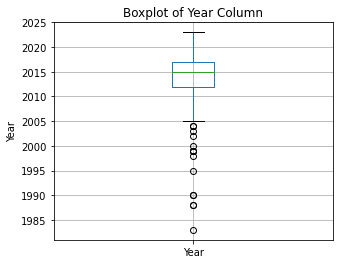

In [10]:
pd.options.display.float_format = '{:.2f}'.format
print(str(df['Year'].describe().transpose()))
plt.figure(figsize=(5, 4))  
df.boxplot(column='Year')
plt.title('Boxplot of Year Column')
plt.ylabel('Year')
plt.show()

### 'Model' Column

In [11]:
df['model'].unique()

array(['i35', 'ניסאן מיקרה', 'סוזוקי סוויפט', 'אוריס', 'פיקנטו',
       'אאודי A1', 'אימפרזה', 'ASX', '220', '525', 'מוקה', 'פורטה', ' Q3',
       'סיוויק סדאן', 'סוזוקי SX4 קרוסאובר', 'קורולה', 'גולף', 'פאסאט',
       'ספארק', 'מאזדה 3', 'ניסאן נוט', 'סול', 'V40 CC', 'לנסר ספורטבק',
       'i10', 'אאודי A3', ' A1', 'סקודה פאביה\r\n (2012)', 'אוקטביה',
       'CIVIC', 'איוניק', 'סונטה', 'i30', 'C-HR', 'מאליבו', 'ריו',
       'פוקוס', 'סקודה אוקטביה (2014)', 'X1', 'אוואו', 'סיוויק',
       'סקודה ראפיד (2015)', ' E-Class', ' S7', 'אפלנדר', 'SVX',
       'סוזוקי איגניס', 'ספייס סטאר', 'לקסוס IS300h', "גראנד, וויאג'ר",
       'C4', '2008', 'סטוניק', 'פולו', 'S60', 'אאודי RS5', "ג'אז הייבריד",
       'סוזוקי SX4', 'ג`טה', ' A4', 'אס-מקס', 'נירו', 'אינסייט',
       'רנו קליאו', '3', 'אאודי All Road', 'פאסאט CC', ' S-Class',
       'CADDY COMBI', 'אסטרה', 'XV', 'סיוויק סדאן החדשה', 'אאודי A5',
       '316', 'C3', 'סדרה 5', 'אקורד', 'i25', 'C1', 'יאריס',
       'לקסוס IS250', 'V40', 'סדרה 1',

In [12]:
import re
df['model'] = df['model'].str.upper()
def replace_hebrew_in_model(df):
    for index, row in df.iterrows():
        manufactor = row['manufactor']
        year = str(row['Year'])  # Convert year to string for comparison
        model = row['model']        
        if manufactor in model:
            df.at[index, 'model'] = model.replace(manufactor, '')        
        if year in model:
            df.at[index, 'model'] = model.replace(f'({year})', '') 
    return df

df = replace_hebrew_in_model(df)
# Transformation functions
def remove_before_comma(s):
    return s.split(',', 1)[-1].lstrip()

def remove_after_word(s):
    if 'CLASS' in s:
        s = s.split('CLASS', 1)[0] + 'CLASS'
    if 'מיטו' in s:
        s = s.split('מיטו', 1)[0] + 'מיטו' 
    index = s.find('דור')
    if index != -1:
        s = s[:index]
    return s

def remove_words(text):
    words_to_remove = [ 'דור 4','חשמלי','החדשה','הדור החדש','חדשה','סקודה']
    for word in words_to_remove:
        text = text.replace(word, '')
    return text.strip()

# Applying transformations
df['model'] = df['model'].str.replace('`', "'")
df['model'] = df['model'].str.replace('קאונטרימן', "קאנטרימן")
df['model'] = df['model'].apply(remove_before_comma)
df['model'] = df['model'].apply(remove_after_word)
df['model'] = df['model'].apply(remove_words)
df['model'] = df['model'].str.strip()
df['model'].unique()

array(['I35', 'מיקרה', 'סוויפט', 'אוריס', 'פיקנטו', 'A1', 'אימפרזה',
       'ASX', '220', '525', 'מוקה', 'פורטה', 'Q3', 'סיוויק סדאן',
       'SX4 קרוסאובר', 'קורולה', 'גולף', 'פאסאט', 'ספארק', '3', 'נוט',
       'סול', 'V40 CC', 'לנסר ספורטבק', 'I10', 'A3', 'פאביה', 'אוקטביה',
       'CIVIC', 'איוניק', 'סונטה', 'I30', 'C-HR', 'מאליבו', 'ריו',
       'פוקוס', 'X1', 'אוואו', 'סיוויק', 'ראפיד', 'E-CLASS', 'S7',
       'אפלנדר', 'SVX', 'איגניס', 'ספייס סטאר', 'IS300H', "וויאג'ר", 'C4',
       '2008', 'סטוניק', 'פולו', 'S60', 'RS5', "ג'אז הייבריד", 'SX4',
       "ג'טה", 'A4', 'אס-מקס', 'נירו', 'אינסייט', 'קליאו', 'ALL ROAD',
       'פאסאט CC', 'S-CLASS', 'CADDY COMBI', 'אסטרה', 'XV', 'A5', '316',
       'C3', 'סדרה 5', 'אקורד', 'I25', 'C1', 'יאריס', 'IS250', 'V40',
       'סדרה 1', 'סראטו', '5', '2', 'קורבט', "אטראז'", 'I20', '200', 'B4',
       '308', "סיוויק האצ'בק", 'אוקטביה ספייס', 'מוקה X', 'גרנד סניק',
       'זאפירה', 'אינסיגניה', '6', 'CT200H', 'אורלנדו', 'אלתימה', 'אלטו',
       '

### 'Gear' Column

In [13]:
df['Gear'].unique()

array(['אוטומטית', 'טיפטרוניק', 'ידנית', 'רובוטית', 'אוטומט', nan,
       'לא מוגדר'], dtype=object)

In [14]:
df['Gear'] = df['Gear'].replace('אוטומט','אוטומטית')
df['Gear'] = df['Gear'].replace('לא מוגדר',np.nan)
df['Gear'] = df['Gear'].replace('None',np.nan)

### 'Capacity_Engine' Column 

In [15]:
df['capacity_Engine'].unique()

array(['1600', '1200', '1450', '1248', '1400', '2400', '2000', '2200',
       '2500', '1500', '1800', '1595', '1,400', '1100', '1000', '4200',
       '1250', '1,197', '1197', '1,500', '1396', '1,200', '1998', '2,400',
       '2800', '6500', '3600', '1199', '4500', '1300', '1,399', '1,100',
       '1568', '3000', '998', '1968', '1586', '1,800', '1290', '5500',
       nan, '1994', '2,000', '12,000', '1598', '2143', '1364', '900',
       '1240', '1,395', '1590', '1798', '1490', '1242', '1997', '1498',
       '3500', '1461', '1999', '1591', '6,600', '3200', '1,470', '988',
       '1,364', '4000', '1,600', '1374', '1470', '1497', '1318', '1495',
       '1187', '800', '1329', '1395', '999', '1376', '1198', '1339',
       '3471', '1399', '2700', '1193', '3300', '2900', '90', '125',
       '1,398', '1280', '80', '1,390', '3800', '15000', '1459', '1368',
       '3,600', '13', '1,300', '1799', '1984', '14000', '1390', '1496',
       '1900', '1,796', '110', '2100', '105', '132', '1350', '3990',
 

In [16]:
df['capacity_Engine'] = df['capacity_Engine'].replace('nan', np.nan)
df['capacity_Engine'] = df['capacity_Engine'].replace('לא מוגדר', np.nan)
df['capacity_Engine'] = df['capacity_Engine'].replace('None', np.nan)
df['capacity_Engine'] = df['capacity_Engine'].str.replace(',', '', regex=True).astype(float).astype('Int64')

---

## Handle missing values

In [17]:
# How much null values we have in each feature.
df.isnull().sum().sort_values()

manufactor            0
Year                  0
model                 0
Hand                  0
Price                 0
Description           0
Gear                  2
Engine_type           5
capacity_Engine      26
Km                   74
Prev_ownership      712
Curr_ownership      712
Supply_score       1037
Test               1267
dtype: int64

In [18]:
# How much percentage of the data is missing in each feature.
def percent_missing(df):
    percent_nan =100 * df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan >0].sort_values()
    return percent_nan
percent_nan = percent_missing(df)
percent_nan

Gear               0.15
Engine_type        0.36
capacity_Engine    1.90
Km                 5.39
Prev_ownership    51.90
Curr_ownership    51.90
Supply_score      75.58
Test              92.35
dtype: float64

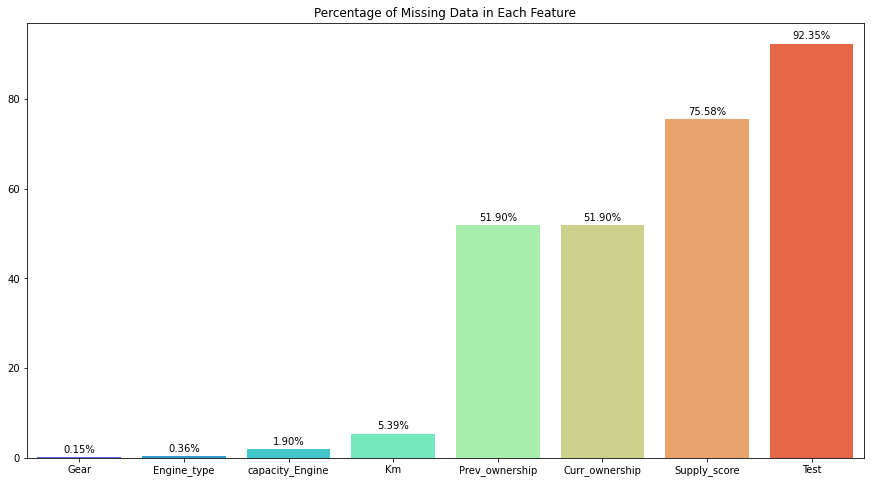

In [19]:
plt.figure(figsize=(15, 8))
sns.barplot(x = percent_nan.index,y = percent_nan,palette = 'rainbow')
plt.xticks(rotation = 0)
plt.title('Percentage of Missing Data in Each Feature')
for i in range(len(percent_nan)):
    plt.text(i, percent_nan[i] + 1, f'{percent_nan[i]:.2f}%', ha='center')

---

## Filling 'Supply Score' Via Web Scraping

Since the names of the models on the GOV website are in English, we created a dictionary that translates the model name from Hebrew to English

In [20]:
import re
car_models_translation = {
    # Audi
    "A1": "A1","A2": "A2","A3": "A3","A4": "A4","A5": "A5","A6": "A6","A7": "A7","A8": "A8","Q2": "Q2","Q3": "Q3","Q5": "Q5","Q7": "Q7","Q8": "Q8","TT": "TT","R8": "R8","RS3": "RS3","RS4": "RS4","RS5": "RS5 COUPE","RS6": "RS6","RS7": "RS7","S3": "S3","S4": "S4","S5": "S5","S6": "S6","S7": "S7","S8": "S8","ALL ROAD":"ALLROAD",

    # Opel
    "אסטרה": "ASTRA","קורסה": "CORSA","אינסיגניה": "INSIGNIA","מריבה": "MERIVA","מוקה": "MOKKA","מוקה X": "MOKKA - X","אדם": "ADAM","זאפירה": "ZAFIRA","קארל": "KARL","אמפרה": "AMPERA","מונזה": "MONZA","קפיטן": "KAPITAN","קומודור": "COMMODORE","קלברא": "CALIBRA",

    # Alfa Romeo
    "ג'וליה": "GIULIA","סטלביו": "STELVIO","מיטו": "ALFA MITO","ג'ולייטה": "ALFA GIULIETTA","4C": "4C","8C": "8C","אלפאסוד": "ALFASUD","אלפאספרינט": "ALFASPRINT","בררה": "BRERA","ספיידר": "SPIDER","145": "145","146": "146","147": "147","155": "155","156": "156","159": "159","164": "164","166": "166",

    # BMW
    "X1": "X1", "X2": "X2", "X3": "X3", "X4": "X4", "X5": "X5", "X6": "X6", "X7": "X7", "Z1": "Z1", "Z3": "Z3", "Z4": "Z4", "i3": "I3", "i8": "I8", "325": "325I", "525": "525I", "523": "523I", "120": "120I", "530": "530I", "318": "318I", "316": "316I",

    #Chevrolet
    "אוואו": "AVEO", "קרוז": "CRUZE", "מאליבו": "MALIBU", "אימפלה": "IMPALA", "ספארק": "SPARK", "סוניק": "SONIC", "קפטיבה": "CAPTIVA", "אורלנדו": "ORLANDO", "טראוורס": "TRAVERSE", "טאהו": "TAHOE", "סילברדו": "SILVERADO", "אפלנדר": "UPLANDER", "קמרו": "CAMARO", "קורסיקה": "CORSICA", "קוואלט": "CAVALIER","קורבט": "CORVETTE", "נובה": "NOVA", "בלייזר": "BLAZER", "אקווינוקס": "EQUINOX", "סוברבן": "SUBURBAN", "וולט": "VOLT", "בולט": "BOLT", "ברלי": "BERETTA", "לומינה": "LUMINA", "מונטה קרלו": "MONTE CARLO", "טראקס":"TRAX",
   

    # Daihatsu
    "סיריון": "SIRION", "טריוס": "TERIOS", "מאטריה": "MATERIA", "גרנד מובר": "GRAND MOVE", "קורה": "COPEN", "מירא": "MIRA", "יונוס": "YRV", "אפלאוס": "APPLAUSE", "פיירי": "CHARADE", "אסקורט": "ESCOORT", "פלטן": "FELLOW", "רוקי": "ROCKY", "פיירי": "CHARADE", "שרמנט":"CHARMANT",

    # Honda
    "סיוויק": "CIVIC", "סיוויק הייבריד": "CIVIC", "סיוויק האצ'בק": "CIVIC", "סיוויק סדאן": "CIVIC", "האצ'בק": "CIVIC", "אקורד": "ACCORD", "CR-V": "CR-V", "ג'אז": "JAZZ", "ג'אז הייבריד": "JAZZ", "HR-V": "HR-V", "פרילוד": "PRELUDE", "אינסייט": "HONDA INSIGHT", "פיילוט": "PILOT", "אג'": "EDGE", "אלמנט": "ELEMENT", "קרוסטור": "CROSSTOUR", "פיט": "FIT", "הונדה E": "HONDA E", "אודסיי": "ODYSSEY", "לג'נד": "LEGEND",

    # Volvo
    "S60": "S60", "S90": "S90", "V40": "V40", "V60": "V60", "V90": "V90", "XC40": "XC40", "XC60": "XC60", "XC90": "XC90", "850": "850", "940": "940", "960": "960", "C30": "C30", "C70": "C70", "S40": "S40", "S70": "S70", "S80": "S80", "V50": "V50", "V70": "V70",
    
    # Toyota
    "קורולה": "COROLLA", "קאמרי": "CAMRY", "רב 4": "RAV4", "יאריס": "YARIS", "פריוס": "PRIUS", "לנד קרוזר": "LAND CRUISER", "היילקס": "HILUX", "סופרה": "SUPRA", "אוונסיס": "AVENSIS", "אונסיס": "AVENSIS", "סיינה": "SIENNA", "סליקה": "CELICA", "ורסו": "VERSO", "טונדרה": "TUNDRA", "טקומה": "TACOMA", "ונזה": "VENZA", "CH-R": "C-HR", "אוריס": "AURIS", "קלוגה": "KLUGER", "ונצה": "VENZA", "מיראי": "MIRAI", "ספייס": "SPACE VERSO", "אייגו":"AYGO",

    # Tesla
    "מודל 3": "MODEL 3", "מודל S": "MODEL S", "מודל X": "MODEL X", "מודל Y": "MODEL Y", "רודסטר": "ROADSTER", "סייברטראק": "CYBERTRUCK", "סמי": "SEMI",

    # Jaguar
    "XF": "XF", "F-TYPE": "F-TYPE", "XE": "XE", "F-PACE": "F-PACE", "E-PACE": "E-PACE", "XJ": "XJ", "I-PACE": "I-PACE", "XK": "XK", "S-TYPE": "S-TYPE", "X-TYPE": "X-TYPE",

    # Hyundai
    "i10": "I10", "i20": "I20", "i30": "I30", "I30CW": "I30", "i40": "I40", "טוסון": "TUCSON", "סנטה פה": "SANTA FE", "קונה": "KONA", "אלנטרה": "ELANTRA", "אקסנט": "ACCENT", "סונטה": "SONATA", "פאליסייד": "PALISADE", "בלנו": "BALENO", "וולוסטר": "VELOSTER", "ולוסטר": "VELOSTER", "אסנט": "ASCENT", "איוניק": "IONIQ HYBRID", "טרג'ט":"TRAJET",
    
    # Kia
    "ריו": "RIO", "פיקנטו": "PICANTO", "קרניבל": "CARNIVAL", "סטוניק": "STONIC", "ספיה": "SEPHIA", "פורטה": "FORTE", "סראטו": "CERATO", "נירו": "NIRO", "נירו EV": "NIRO EV", "נירו PHEV": "NIRO PHEV", "סול": "SOUL", "סיד": "CEED", "פרייד":"PRIDE",
    
    # Lexus
    "NX": "NX", "RX": "RX", "ES": "ES", "GS": "GS", "IS": "IS", "LS": "LS", "LC": "LC", "LX": "LX", "UX": "UX", "SC": "SC", "IS300H": "LEXUS IS300H", "IS250":  "LEXUS IS250", "GS300": "LEXUS GS300", "CT200H": "LEXUS CT200H",

    # Mazda
    "3": "MAZDA 3", "6": "MAZDA 6", "CX-3": "CX-3", "CX-5": "CX-5", "CX-7": "CX-7", "CX-9": "CX-9", "MX-5": "MX-5", "2": "MAZDA 2", "5": "MAZDA 5", "קפלה": "CAPELLA", "רוקי": "ROCKY", "אטנזה": "ATENZA", "סבנה": "SAVANNA", "לנטיס": "LANTIS",

    # Mini
    "קופר": "COOPER", "קאנטרימן": "COUNTRYMAN", "קלאבמן": "CLUBMAN", "פייסמן": "PACEMAN", "רודסטר": "ROADSTER", "קופה": "COUPE", "ג'ון קופר וורקס": "JOHN COOPER WORKS",

    # Mitsubishi
    "אאוטלנדר": "OUTLANDER", "ASX": "ASX", "לנסר": "LANCER", "לנסר ה": "LANCER", "פאג'רו": "PAJERO", "ספייס סטאר": "SPACE STAR", "אקאליפס קרוס": "ECLIPSE CROSS", "מיראז'": "MIRAGE", "גרנדיס": "GRANDIS", "קולט": "COLT", "דיאמנטה": "DIAMANTE", "לנסר אבולושן": "LANCER EVOLUTION", "לנסר ספורטבק":  "LANCER SPORTBAC", "מונטרו": "MONTERO", "פג'רו": "PAJERO", "סיגמה": "SIGMA", "גאלנט": "GALANT", "אטראז'": "ATTRAGE", "אקליפס": "ECLIPSE CROSS",

    # Mercedes
    "A-CLASS": "A-CLASS", "B-CLASS": "B-CLASS", "C-CLASS": "C-CLASS", "E-CLASS": "E CLASS", "S-CLASS": "S-CLASS", "CLA": "CLA", "GLA": "GLA", "GLC": "GLC", "GLE": "GLE", "GLS": "GLS", "G-CLASS": "G CLASS", "SL": "SL", "SLK": "SLK", "CLK": "CLK", "ML": "ML", "AMG GT": "AMG GT", "EQC": "EQC", "SLC": "SLC", "V- CLASS":"V CLASS",

    # Nissan
    "קשקאי": "QASHQAI", "מיקרה": "MICRA", "ג'וק JUKE": "JUKE", "נבארה": "NAVARA", "אקסטרייל": "X-TRAIL", "ליפ": "LEAF", "פטרול": "PATROL", "סאני": "SUNNY", "אלמרה": "ALMERA", "מקסימה": "MAXIMA", "GT-R": "GT-R", "350Z": "350Z", "370Z": "370Z", "קובוסטר": "CUBE", "פרונטר": "FRONTIER", "מורנו": "MURANO", "ארמדה": "ARMADA", "תאנה": "TITAN", "סנטרא": "SENTRA", "רוג'": "ROGUE", "טרנו": "TERRANO", "קלס": "KICKS", "אלתימה":"ALTIMA", "סנטרה":"SENTRA", "נוט":"NOTE", "פרימרה":"PRIMERA",

    # Subaru
    "פורסטר": "FORESTER", "אימפרזה": "IMPREZA", "אאוטבק": "OUTBACK", "XV": "XV", "BRZ": "BRZ", "לגאסי": "LEGACY", "טרייבקה": "TRIBECA", "לברג": "LEVORG", "באחה": "BAJA", "ג'סטי": "JUSTY", "באז": "B9 TRIBECA", "אלקס": "ALCYONE", "אנקס": "ANNEX", "לאונה":"LEON",

    # Suzuki
    "סוויפט": "SWIFT", "ויטארה": "VITARA", "SX4": "SX4", "סלריו": "CELERIO", "איגניס": "IGNIS", "בלנו": "BALENO", "ג'ימני": "JIMNY", "ספלאש": "SPLASH", "אלטו": "ALTO", "קיזאשי": "KIZASHI", "אסקודו": "ESCUDO", "קרימן": "CARRY", "פאן קארי": "FUN CARRY", "ספאזיו": "SPACIO", "וואגון אר": "WAGON R", "מייטי בוי": "MIGHTY BOY", "קרוסאובר": "CROSSOVER", "SX4 קרוסאובר": "SX4 CROSSOVER", "סדן" : "SX4",

    # Seat
    "איביזה": "IBIZA", "לאון": "LEON", "ארונה": "ARONA", "אטקה": "ATECA", "טאראקו": "TARRACO", "אלתאה": "ALTEA", "אלמברה": "ALHAMBRA", "מיי": "MII","קורדובה": "CORDOBA",  "טולדו": "TOLEDO",  "מרבלה": "MARBELLA",  "מלגה": "MALAGA",  "רטמו": "RITMO",  "פנדה": "PANDA",  "אינקה": "INCA",  "פורמנטור": "FORMENTOR",

    # Citroën
    "C3": "C3", "C5": "C5", "C4 קקטוס": "C4 CACTUS", "C4 פיקאסו": "C4 PICASSO", "C1": "C1", "ברלינגו": "BERLINGO", "DS3": "DS3", "DS4": "DS4", "DS5": "DS5", "C2": "C2", "C6": "C6", "ק.אס.אקס": "C-CROSSER", "ZX": "ZX", "קסנטיה": "XANTIA", "סאקסו": "SAXO", "ק.אס.קייפ": "C-CAMPER",

    # Skoda
    "פאביה": "FABIA", "פאביה ספייס":"FABIA SPACE", "אוקטביה": "OCTAVIA", "אוקטביה RS":"OCTAVIA RS", "אוקטביה ספייס": "OCTAVIA SPACE", "סופרב": "SUPERB", "קאדיאק": "KODIAQ", "קאמיק": "KAMIQ", "קארוק": "KAROQ", "ראפיד": "RAPID", "סיטיגו / CITYGO": "CITIGO", "ייטי": "YETI", "פלישיה": "FELICIA", "פאבוריט": "FAVORIT", "אוסטין": "OCTAVIA TOUR", "פורמן": "FORMAN", "סקאוט": "SCOUT", "רומסטר": "ROOMSTER",
    
    # Volkswagen
    "פולו": "POLO", "גולף": "GOLF", "פאסאט": "PASSAT", "טיגואן": "TIGUAN", "טוראן": "TOURAN", "שירוקו": "SCIROCCO", "ארטיאון": "ARTEON", "פאיטון": "PHAETON", "באבילי": "BEETLE", "איד.4": "ID.4", "טוראן": "TOUAREG", "ג'טה": "JETTA", "פולקאן": "VOLCANO", "שירוקו": "SCI",

    # Ford
    "פוקוס": "FOCUS", "פיאסטה": "FIESTA", "מונדיאו": "MONDEO", "קוגה": "KUGA", "אקספלורר": "EXPLORER", "אסקייפ": "ESCAPE", "גלאקסי": "GALAXY", "טורנאו קונקט": "TOURNEO CONNECT", "פומה": "PUMA", "אדג'": "EDGE", "מוסטנג": "MUSTANG", "אקוספורט": "ECOSPORT", "ב-מקס": "B-MAX", "סי-מקס": "C-MAX", "רנג'ר": "RANGER", "פלקס": "FLEX", "אס-מקס": "S MAX",

    # Fiat
    "פנדה": "PANDA", "פונטו": "PUNTO", "500": "500", "500L": "500L", "500X": "500X", "טיפו": "TIPO", "בראבו": "BRAVO", "בראבה": "BRAVA", "סיינה": "SIENA", "אונו": "UNO", "קרומא": "CROMA", "מולטיפלה": "MULTIPLA", "דוראלדו": "DUCATO", "קובו": "QUBO", "פאליו": "PALIO", "ריטמו": "RITMO", "דובלו": "DOBLO",

    # Peugeot
    "208": "208", "2008": "2008", "3008": "3008", "308": "308", "508": "508", "5008": "5008", "4008": "4008", "206": "206", "306": "306", "406": "406", "607": "607", "807": "807", "PARTNER": "PARTNER", "RCZ": "RCZ", "BX": "BX", "305": "305", "405": "405", "505": "505", "605": "605",
    
    #Renualet
    "קליאו": "CLIO", "מגאן": "MEGANE", "קפצ'ור": "CAPTUR", "קולאוס": "KOLEOS", "טווינגו": "TWINGO", "פלואנס": "FLUENCE", "לאטיטוד": "LATITUDE", "סקאלה": "SCALA", "טרפיק": "TRAFIC", "קנגו": "KANGOO", "מאסטר": "MASTER", "לוגאן": "LOGAN", "דאסטר": "DUSTER", "זואי": "ZOE", "סניק": "SCENIC", "גראנד סניק": "GRAND SCENIC", "גרנד סניק":"GRAND SCENIC", "אילקטריק": "ELECTRIC", "טאליסמן": "TALISMAN", "אלפין": "ALPINE", "אוויאון": "AVANTIME", "אוויאטור": "AVANTIME", "אגו": "KADJAR", "אספאס": "ESPACE", "לאגונה": "LAGUNA", "ספייסר": "SPIDER", "פלואנס Z.E.": "FLUENCE Z.E.",
    
    #Volchvagen
    "גולף": "GOLF", "גולף פלוס":"GOLF PLUS", "פולו": "POLO", "פאסאט": "PASSAT", "טיגואן": "TIGUAN", "טוארג": "TOUAREG", "ג'טה": "JETTA", "ביטל": "BEETLE", "שירוקו": "SCIROCCO", "שיראן": "SHARAN", "אמארוק": "AMAROK", "אפליקטה": "ARTEON", "אידי 3": "ID.3", "אידי 4": "ID.4", "אידי 6": "ID.6", "אפ!": "UP!", "קרבל": "CARAVELLE", "טרנספורטר": "TRANSPORTER", "מולטיוואן": "MULTIVAN", "קראוון": "CADDY", "פולו GTI": "POLO GTI", "גולף GTI": "GOLF GTI", "גולף R": "GOLF R", "פאסאט VR6": "PASSAT VR6", "פאסאט CC": "PASSAT CC", "חיפושית": "BEETLE", 
    "וויאג'ר":"VOYAGER"
}
import warnings
warnings.filterwarnings('ignore')

def translate_model(hebrew_model):
    return car_models_translation.get(hebrew_model, hebrew_model)  # Return English translation or original if not found

# apply translation function to create a new column 'model_english'
df['model_english'] = df['model'].apply(translate_model)
# create manufactor_GOV column that suitable to the GOV site
df['manufactor_GOV']=df['manufactor']
df['manufactor_GOV'] = df['manufactor_GOV'].replace('וולוו','וולבו')
df['manufactor_GOV'] = df['manufactor_GOV'].replace('מאזדה','מזדה')
df['manufactor_GOV'] = df['manufactor_GOV'].replace('ב.מ.וו','ב מ וו')
df['manufactor_GOV'] = df['manufactor_GOV'].replace('מיני','ב מ וו')
# manule model renaming with conditions
df.loc[ (df['manufactor']=='מרצדס') & df['Description'].str.contains('S 600', na=False) , 'model_english'] = 'S600'
df.loc[ (df['manufactor']=='מרצדס') & df['Description'].str.contains('c200', na=False) , 'model_english'] = 'C200'
df.loc[ (df['manufactor']=='מרצדס') & df['Description'].str.contains('e350', na=False) , 'model_english'] = 'E350'
df.loc[ (df['manufactor']=='מרצדס') & df['Description'].str.contains('s 550', na=False) , 'model_english'] = 'S550'
df.loc[ (df['manufactor']=='מרצדס') & df['Description'].str.contains('ml320', na=False) , 'model_english'] = 'ML320'
df.loc[(df['model_english'] == 'SUPERB') & (df['Year'] > 2015), 'model_english'] = 'NEW SUPERB'

We will create a function that scrape from the website the appropriate Supply Score by manufacturer, model, and year

In [21]:
import requests
import pandas as pd
import unicodedata
import difflib

# The function clean up and normalize the input text.
def normalize_text(text):
    if text is not None:
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
        return text.strip().upper()
    return None

# The function aims to find the closest match for a given model name from a list of model names using a similarity threshold. 
def fuzzy_match(model, models_list, threshold=0.8):
    matches = difflib.get_close_matches(model, models_list, n=1, cutoff=threshold)
    return matches[0] if matches else None

# The scraping function to get supply info
def get_supply_info_dict(model_dict):
    supply_info = {}
    not_found_count = 0
    try:
        url = 'https://data.gov.il/api/3/action/datastore_search?resource_id=5e87a7a1-2f6f-41c1-8aec-7216d52a6cf6'
        records = []
        offset = 0
        limit = 1000  
        while True:
            response = requests.get(url, params={'offset': offset, 'limit': limit})
            if response.status_code != 200:
                break
            results_page = response.json()
            new_records = results_page['result']['records']
            if not new_records:
                break  # Exit the loop if there are no more records
            records.extend(new_records)
            offset += limit  # Fetch the next page of results

        # Convert to DataFrame
        df_records = pd.DataFrame(records)
        df_records['kinuy_mishari'] = df_records['kinuy_mishari'].apply(normalize_text)
        df_records['mispar_rechavim_pailim'] = pd.to_numeric(df_records['mispar_rechavim_pailim'], errors='coerce').fillna(0).astype(int)

        for manufacturer, models_years in model_dict.items():
            for model, year in models_years:
                normalized_model = normalize_text(model)
                filtered_records = df_records[(df_records['tozar'] == manufacturer) & (df_records['shnat_yitzur'] == year)                                             & (df_records['kinuy_mishari'] == model)]
                if filtered_records.empty:
                    not_found_count += 1
                else:
                    closest_match = fuzzy_match(normalized_model, filtered_records['kinuy_mishari'].tolist())
                    if closest_match:
                        total_supply_score = filtered_records[filtered_records['kinuy_mishari'] == closest_match]['mispar_rechavim_pailim'].sum()
                        supply_info[(manufacturer, model, year)] = total_supply_score
                    else:
                        not_found_count += 1

    except requests.exceptions.RequestException as e:
        pass
    except Exception as e:
        pass
    return supply_info, not_found_count

# Group models by manufacturer and apply the scraping function to recive for each manufactor,year and model the supply score
manufacturer_model_dict = df.groupby('manufactor_GOV')[['model_english', 'Year']].apply(lambda x: list(zip(x['model_english'], x['Year']))).to_dict()
supply_info_dict, not_found_count = get_supply_info_dict(manufacturer_model_dict)
supply_info_dict, not_found_count

({('אאודי', 'A1', 2015): 401,
  ('אאודי', 'Q3', 2014): 344,
  ('אאודי', 'A3', 2007): 66,
  ('אאודי', 'A1', 2016): 723,
  ('אאודי', 'A3', 2016): 816,
  ('אאודי', 'S7', 2014): 5,
  ('אאודי', 'A1', 2014): 249,
  ('אאודי', 'RS5 COUPE', 2019): 4,
  ('אאודי', 'A4', 2009): 170,
  ('אאודי', 'A5', 2013): 35,
  ('אאודי', 'A1', 2012): 314,
  ('אאודי', 'A3', 2014): 683,
  ('אאודי', 'A4', 2010): 116,
  ('אאודי', 'A6', 2009): 124,
  ('אאודי', 'A4', 2015): 310,
  ('אאודי', 'A3', 2013): 390,
  ('אאודי', 'A3', 2006): 40,
  ('אאודי', 'A5', 2009): 27,
  ('אאודי', 'A3', 2010): 21,
  ('אאודי', 'A1', 2011): 283,
  ('אאודי', 'A3', 2012): 60,
  ('אאודי', 'R8', 2013): 1,
  ('אאודי', 'Q3', 2013): 325,
  ('אאודי', 'A1', 2017): 570,
  ('אאודי', 'S5', 2013): 4,
  ('אאודי', 'S3', 2015): 58,
  ('אופל', 'MOKKA', 2017): 278,
  ('אופל', 'MOKKA', 2016): 814,
  ('אופל', 'ASTRA', 2015): 186,
  ('אופל', 'ASTRA', 2016): 846,
  ('אופל', 'MOKKA - X', 2016): 0,
  ('אופל', 'ZAFIRA', 2015): 22,
  ('אופל', 'INSIGNIA', 2014): 247,

In [22]:
# Create lists for DataFrame construction
manufacturers = []
models = []
years = []
supply_scores = []

for (manufacturer, model, year), supply_score in supply_info_dict.items():
    manufacturers.append(manufacturer)
    models.append(model)
    years.append(year)
    supply_scores.append(supply_score)

# Create DataFrame from lists
supply_info_df = pd.DataFrame({
    'manufactor_GOV': manufacturers,
    'model': models,
    'Year': years,
    'Supply_score_All': supply_scores})

supply_info_df

,manufactor_GOV,model,Year,Supply_score_All
0,אאודי,A1,2015,401
1,אאודי,Q3,2014,344
2,אאודי,A3,2007,66
3,אאודי,A1,2016,723
4,אאודי,A3,2016,816
...,...,...,...,...
489,שברולט,UPLANDER,2008,123
490,שברולט,MALIBU,2009,441
491,שברולט,SONIC,2012,2
492,שברולט,CRUZE,2013,754


In [23]:
# merge the df with the founded supply_info_df
df = df.merge(
    supply_info_df[['manufactor_GOV', 'model', 'Year', 'Supply_score_All']],
    left_on=['manufactor_GOV', 'model_english', 'Year'],
    right_on=['manufactor_GOV', 'model', 'Year'],
    how='left',
    suffixes=('', '_supply'))

print("Columns after merge:", df.columns)
df

Columns after merge: Index(['manufactor', 'Year', 'model', 'Hand', 'Gear', 'capacity_Engine',
       'Engine_type', 'Prev_ownership', 'Curr_ownership', 'Price',
       'Description', 'Km', 'Test', 'Supply_score', 'model_english',
       'manufactor_GOV', 'model_supply', 'Supply_score_All'],
      dtype='object')


,manufactor,Year,model,Hand,Gear,capacity_Engine,Engine_type,Prev_ownership,Curr_ownership,Price,Description,Km,Test,Supply_score,model_english,manufactor_GOV,model_supply,Supply_score_All
0,יונדאי,2015,I35,2,אוטומטית,1600,בנזין,פרטית,פרטית,51000.00,['רכב שמור בקנאות\nמוכרת עקב קבלת רכב חברה'],144000,NaN,NaN,I35,יונדאי,I35,6836.00
1,ניסאן,2018,מיקרה,1,אוטומטית,1200,בנזין,פרטית,פרטית,49000.00,['שמורה כל התוספות'],69000,NaN,NaN,MICRA,ניסאן,MICRA,4939.00
2,סוזוקי,2010,סוויפט,1,אוטומטית,1450,בנזין,NaN,NaN,22500.00,['רכב במצב מתוחזק ברמה גבוהה טסט עד אפריל 2023'],145000,NaN,NaN,SWIFT,סוזוקי,SWIFT,1906.00
3,טויוטה,2016,אוריס,1,טיפטרוניק,1600,בנזין,פרטית,פרטית,63000.00,['אוטו במצב חדש!! שמור בקנאות!! נהג יחיד מטופל...,27300,NaN,NaN,AURIS,טויוטה,AURIS,343.00
4,קיה,2012,פיקנטו,1,אוטומטית,1248,בנזין,NaN,NaN,37000.00,['שמור'],70000,NaN,4.00,PICANTO,קיה,PICANTO,3781.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,סקודה,2016,אוקטביה,2,אוטומטית,1400,בנזין,NaN,NaN,60000.00,['רכב שמור &lt;br/&gt;&lt;br/&gt;פירוט:&lt;br/...,180,NaN,NaN,OCTAVIA,סקודה,OCTAVIA,8105.00
1368,אלפא רומיאו,2013,ג'ולייטה,4,ידנית,1400,בנזין,NaN,NaN,45000.00,['פרטית \r\nמכונית יפיפיה ללא שום תאונות ואו ת...,160000,NaN,NaN,ALFA GIULIETTA,אלפא רומיאו,ALFA GIULIETTA,265.00
1369,סקודה,2014,ראפיד,1,אוטומטית,1400,בנזין,NaN,NaN,30000.00,['רכב נקי גיר שילדה מנוע במצב מעולה &lt;br/&gt...,NaN,NaN,NaN,RAPID,סקודה,RAPID,2173.00
1370,ניסאן,2011,ג'וק JUKE,3,אוטומטית,1600,בנזין,פרטית,פרטית,28000.00,"['רכב מתוחזק היטב ללא תאונות או תקלות, טסט עד ...",118000,81,NaN,JUKE,ניסאן,JUKE,2933.00


In [24]:
df[df['Supply_score_All'].isna()]

,manufactor,Year,model,Hand,Gear,capacity_Engine,Engine_type,Prev_ownership,Curr_ownership,Price,Description,Km,Test,Supply_score,model_english,manufactor_GOV,model_supply,Supply_score_All
6,סובארו,2009,אימפרזה,3,ידנית,2400,בנזין,פרטית,פרטית,95000.00,['Sti שחור מאט ללא תאונות שמורה מאד.\nיד שלישי...,125000,83,NaN,IMPREZA,סובארו,NaN,NaN
8,מרצדס,2015,220,1,אוטומטית,2200,דיזל,NaN,NaN,70000.00,"[""מונית לשעבר.רכב שמור ומטופל ,הוחלף מנוע יש ח...",NaN,NaN,NaN,220,מרצדס,NaN,NaN
9,ב.מ.וו,2003,525,3,אוטומטית,2500,דיזל,NaN,NaN,45000.00,"['רכב מיבוא אישי, במצב מעולם.\r\nהרכב עם תוכנה...",400000,NaN,57.00,525I,ב מ וו,NaN,NaN
26,וולוו,2014,V40 CC,4,אוטומטית,1600,בנזין,פרטית,פרטית,46000.00,['מוכר את הרכב עקב קבלה של רכב חברה \nמדובר ב ...,105000,0,0.00,V40 CC,וולבו,NaN,NaN
27,מיצובישי,2020,לנסר ספורטבק,2,אוטומטית,4200,גז,פרטית,פרטית,35000.00,['2020 מיצובישי אאוטלנדר ספורט ES 4x4 1-בעלים ...,90000,NaN,NaN,LANCER SPORTBAC,מיצובישי,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,טויוטה,2015,פריוס,2,אוטומטית,1800,היבריד,ליסינג,פרטית,85000.00,['None'],125000,NaN,NaN,PRIUS,טויוטה,NaN,NaN
1340,ב.מ.וו,2016,סדרה 1,4,אוטומטית,1500,בנזין,פרטית,פרטית,60000.00,['במוו סדרה 1 \n95 אלף קילומטר \nטסט לשנה\nהנע...,95000,NaN,354.00,סדרה 1,ב מ וו,NaN,NaN
1353,ב.מ.וו,2017,סדרה 1,2,אוטומטית,2000,בנזין,NaN,NaN,90000.00,['רכב חדש לגמרי ללא תאונות 2017 יד שניה . פרטי...,79000,NaN,526.00,סדרה 1,ב מ וו,NaN,NaN
1354,קיה,2017,נירו EV,2,אוטומטית,1580,היברידי,NaN,NaN,94500.00,['יפה שמור'],140000,NaN,NaN,NIRO EV,קיה,NaN,NaN


In [25]:
supply_info_df['Supply_score_All'].describe()

count     494.00
mean     2131.88
std      2603.73
min         0.00
25%       322.75
50%      1233.00
75%      2927.00
max     16435.00
Name: Supply_score_All, dtype: float64

We will fill the missing values with the function The fill_missing_supply_scores that fills the missing values for the Supply_score_All column in the df using the best machine learning regression model.

LinearRegression: Mean Squared Error = 1831876.47
RMSE: 1353.47
Ridge: Mean Squared Error = 1816787.70
RMSE: 1347.88
Lasso: Mean Squared Error = 1800859.06
RMSE: 1341.96
ElasticNet: Mean Squared Error = 7951457.06
RMSE: 2819.83
DecisionTreeRegressor: Mean Squared Error = 405457.07
RMSE: 636.76
RandomForestRegressor: Mean Squared Error = 338714.60
RMSE: 581.99


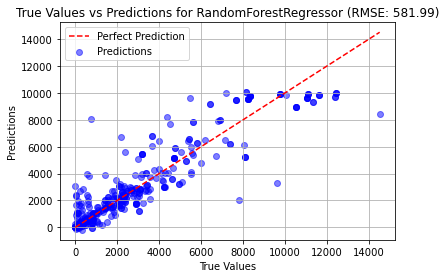

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def fill_missing_supply_scores(df):
    df_train = df.dropna(subset=['Supply_score_All'])
    X = df_train[['manufactor_GOV', 'model', 'Year']]  # Features
    y = df_train['Supply_score_All']  # Target variable
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # One-hot encode categorical variables
    preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),['manufactor_GOV','model']),],remainder='passthrough')

    # Models to evaluate
    models = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'DecisionTreeRegressor': DecisionTreeRegressor(),
        'RandomForestRegressor': RandomForestRegressor()}
    results = {}
    best_pipeline = None
    
    # Create a pipeline for each model
    for model_name, model in models.items():
        pipeline = Pipeline([('preprocessor', preprocessor),('regressor', model)])
        pipeline.fit(X_train, y_train)
        # Predict on the test set
        y_pred = pipeline.predict(X_test)
        # Calculate Mean Squared Error
        mse = mean_squared_error(y_test, y_pred)
        results[model_name] = mse
        if best_pipeline is None or mse < results[min(results, key=results.get)]:
            best_pipeline = pipeline

    # Find model with lowest MSE on training data
    best_model_name = min(results, key=results.get)
    # Predict missing values in df using the best model
    X_missing = df.loc[df['Supply_score_All'].isnull(), ['manufactor_GOV', 'model', 'Year']]

    if not X_missing.empty:
        # Predict missing values
        predicted_values = best_pipeline.predict(X_missing)
        # Fill predicted values back into df
        rounded_values = np.round(predicted_values)
        df.loc[df['Supply_score_All'].isnull(), 'Supply_score_All'] = rounded_values
    
    return df, results, y_test, X_test, best_model_name, best_pipeline

df, results, y_test, X_test, best_model_name, best_pipeline = fill_missing_supply_scores(df)

# Print results and RMSE
best_rmse = float('inf')
best_rmse_model_name = None
for model_name, mse in results.items():
    print(f"{model_name}: Mean Squared Error = {mse:.2f}")
    rmse = mse ** 0.5
    print(f"RMSE: {rmse:.2f}")
    if rmse < best_rmse:
        best_rmse = rmse
        best_rmse_model_name = model_name
plt.figure(figsize=(6, 4))
y_pred_best = best_pipeline.predict(X_test)
plt.scatter(y_test, y_pred_best, color='blue', label='Predictions', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'True Values vs Predictions for {best_rmse_model_name} (RMSE: {best_rmse:.2f})')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
df = df.drop(['model_supply','Supply_score'],axis = 1)
df = df.rename(columns={'Supply_score_All': 'Supply_score'})
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 1371
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufactor       1372 non-null   object 
 1   Year             1372 non-null   int64  
 2   model            1372 non-null   object 
 3   Hand             1372 non-null   int64  
 4   Gear             1370 non-null   object 
 5   capacity_Engine  1346 non-null   Int64  
 6   Engine_type      1367 non-null   object 
 7   Prev_ownership   660 non-null    object 
 8   Curr_ownership   660 non-null    object 
 9   Price            1372 non-null   float64
 10  Description      1372 non-null   object 
 11  Km               1298 non-null   object 
 12  Test             105 non-null    object 
 13  model_english    1372 non-null   object 
 14  manufactor_GOV   1372 non-null   object 
 15  Supply_score     1372 non-null   float64
dtypes: Int64(1), float64(2), int64(2), object(11)
memory usage: 

,manufactor,Year,model,Hand,Gear,capacity_Engine,Engine_type,Prev_ownership,Curr_ownership,Price,Description,Km,Test,model_english,manufactor_GOV,Supply_score
0,יונדאי,2015,I35,2,אוטומטית,1600,בנזין,פרטית,פרטית,51000.00,['רכב שמור בקנאות\nמוכרת עקב קבלת רכב חברה'],144000,NaN,I35,יונדאי,6836.00
1,ניסאן,2018,מיקרה,1,אוטומטית,1200,בנזין,פרטית,פרטית,49000.00,['שמורה כל התוספות'],69000,NaN,MICRA,ניסאן,4939.00
2,סוזוקי,2010,סוויפט,1,אוטומטית,1450,בנזין,NaN,NaN,22500.00,['רכב במצב מתוחזק ברמה גבוהה טסט עד אפריל 2023'],145000,NaN,SWIFT,סוזוקי,1906.00
3,טויוטה,2016,אוריס,1,טיפטרוניק,1600,בנזין,פרטית,פרטית,63000.00,['אוטו במצב חדש!! שמור בקנאות!! נהג יחיד מטופל...,27300,NaN,AURIS,טויוטה,343.00
4,קיה,2012,פיקנטו,1,אוטומטית,1248,בנזין,NaN,NaN,37000.00,['שמור'],70000,NaN,PICANTO,קיה,3781.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,סקודה,2016,אוקטביה,2,אוטומטית,1400,בנזין,NaN,NaN,60000.00,['רכב שמור &lt;br/&gt;&lt;br/&gt;פירוט:&lt;br/...,180,NaN,OCTAVIA,סקודה,8105.00
1368,אלפא רומיאו,2013,ג'ולייטה,4,ידנית,1400,בנזין,NaN,NaN,45000.00,['פרטית \r\nמכונית יפיפיה ללא שום תאונות ואו ת...,160000,NaN,ALFA GIULIETTA,אלפא רומיאו,265.00
1369,סקודה,2014,ראפיד,1,אוטומטית,1400,בנזין,NaN,NaN,30000.00,['רכב נקי גיר שילדה מנוע במצב מעולה &lt;br/&gt...,NaN,NaN,RAPID,סקודה,2173.00
1370,ניסאן,2011,ג'וק JUKE,3,אוטומטית,1600,בנזין,פרטית,פרטית,28000.00,"['רכב מתוחזק היטב ללא תאונות או תקלות, טסט עד ...",118000,81,JUKE,ניסאן,2933.00


### The Test column:
We will serch for the word 'טסט' in the column 'Description', in order to find how many test values we can extract. 

In [28]:
print("Not Nan values in the Test column: " + str(df['Test'].count()))
Test_values_desc = df[df['Description'].str.contains('טסט', na=False) & df['Test'].isna()]
print("We can fill "+str(Test_values_desc.shape[0]) +" Values from the 'Description' column.")
Available_Test_values = df[df['Description'].str.contains('טסט', na=False) | df['Test'].notna()]
print("Total Not Nan values after filling from the 'Description': "+ str( Available_Test_values.shape[0] ))

Not Nan values in the Test column: 105
We can fill 296 Values from the 'Description' column.
Total Not Nan values after filling from the 'Description': 401


In [29]:
print("The percentage of the missing values after filling: " +str(100 - round((Available_Test_values.shape[0]/len(df))*100,2))+"%")

The percentage of the missing values after filling: 70.77%


Since we still have too many missing values in the "Test" column and we have no way to complete or predict the value, we will drop this column (The other option was to drop about 70% of the data, which leaves us with too little data for the model)

---

In [30]:
df.drop('Test', axis=1, inplace=True)

### The  Curr_ownership column:
we asuume that in the descreption the current ownership will be described with the words: 'פרטי','ליסינג',השכרה','חברה','מונית','ממשלתי'

In [31]:
df['Curr_ownership'].value_counts()

פרטית       605
לא מוגדר     42
ליסינג        6
None          2
חברה          2
אחר           2
השכרה         1
Name: Curr_ownership, dtype: int64

In [32]:
df['Curr_ownership'] = df['Curr_ownership'].replace('לא מוגדר',np.nan)
df['Curr_ownership'] = df['Curr_ownership'].replace('None',np.nan)
print("Missing values: "+ str(df['Curr_ownership'].isnull().sum()))

Missing values: 756


Missing values after filling from the 'Description': 673
פרטית     635
חברה       35
ליסינג     19
השכרה       5
מונית       3
אחר         2
Name: Curr_ownership, dtype: int64


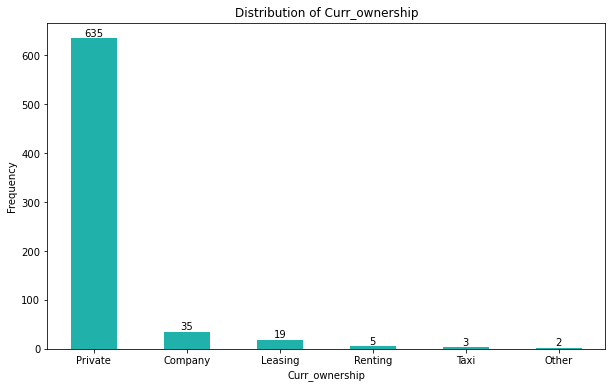

In [33]:
# Filling values fron the Description
df.loc[pd.isna(df['Curr_ownership']) & df['Description'].str.contains('פרטית', na=False), 'Curr_ownership'] = 'פרטית'
df.loc[pd.isna(df['Curr_ownership']) & df['Description'].str.contains('ליסינג', na=False), 'Curr_ownership'] = 'ליסינג'
df.loc[pd.isna(df['Curr_ownership']) & df['Description'].str.contains('השכרה', na=False), 'Curr_ownership'] = 'השכרה'
df.loc[pd.isna(df['Curr_ownership']) & df['Description'].str.contains('חברה', na=False), 'Curr_ownership'] = 'חברה'
df.loc[pd.isna(df['Curr_ownership']) & df['Description'].str.contains('מונית', na=False), 'Curr_ownership'] = 'מונית'
df.loc[pd.isna(df['Curr_ownership']) & df['Description'].str.contains('ממשלתי', na=False), 'Curr_ownership'] = 'ממשלתי'
# for 'אחר' we will not use this method because this is inconclusive.
print("Missing values after filling from the 'Description': "+ str(df['Curr_ownership'].isnull().sum()))
print(df['Curr_ownership'].value_counts())
df_english = df.copy()
df_english['Curr_ownership'].replace('פרטית','Private',inplace=True)
df_english['Curr_ownership'].replace('ליסינג','Leasing',inplace=True)
df_english['Curr_ownership'].replace('השכרה','Renting',inplace=True)
df_english['Curr_ownership'].replace('אחר','Other',inplace=True)
df_english['Curr_ownership'].replace('חברה','Company',inplace=True)
df_english['Curr_ownership'].replace('מונית','Taxi',inplace=True)
df_english['Curr_ownership'].replace('ממשלתי','Governmental',inplace=True)
df_english['Curr_ownership'].value_counts()

plt.figure(figsize=(10,6))
ax = df_english['Curr_ownership'].value_counts().plot(kind='bar', color='lightseagreen')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.title('Distribution of Curr_ownership')
plt.xlabel('Curr_ownership')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()


Since we see that the majority of the ownership is private ownership, and we know that most of the ownerships in real life are private, we will fill in the remaining missing valueswith private ownership.

In [34]:
df['Curr_ownership'].fillna(value='פרטית', inplace=True)
print("Missing data remaning: "+str(round(df['Curr_ownership'].isnull().sum()/len(df),3)))

Missing data remaning: 0.0


---
### The Prev_ownership column:

In [35]:
df['Prev_ownership'].value_counts()

פרטית       465
ליסינג       88
לא מוגדר     43
השכרה        23
אחר          22
חברה         11
מונית         4
None          3
ממשלתי        1
Name: Prev_ownership, dtype: int64

In [36]:
df['Prev_ownership'] = df['Prev_ownership'].replace('לא מוגדר',np.nan)
df['Prev_ownership'] = df['Prev_ownership'].replace('None',np.nan)
print("Missing values: "+ str(df['Prev_ownership'].isnull().sum()))

Missing values: 758


We noticed that each row has both types of ownership (previous and current) or no ownership at all. Therefore, we assumed that the default on the website is to fill in both fields or not at all. We will check for how many cases the ownerships are the same:

In [37]:
df_copy = df.copy()
df_copy['Same_Ownership'] = 0  # Initialize with 0
df_copy.loc[df['Prev_ownership'] == df_copy['Curr_ownership'], 'Same_Ownership'] = 1
print("In " + str(round(100*df_copy['Same_Ownership'].sum() / df_copy['Prev_ownership'].count(), 2)) + "% of the cases the Curr_ownership = Prev_ownership")

In 76.55% of the cases the Curr_ownership = Prev_ownership


We assumed that for first-hand cars, there is no previous ownership.
We noticed that there isn't a category for a new car, therefore for first-hand cars we will define a new category of new car:

In [38]:
df.loc[df['Hand'] == 1, 'Prev_ownership'] = 'חדש' 
print("Missing values: "+ str(df['Prev_ownership'].isnull().sum()))
df['Prev_ownership'].value_counts() 

Missing values: 509


פרטית     379
חדש       364
ליסינג     77
השכרה      21
חברה       10
אחר         7
מונית       4
ממשלתי      1
Name: Prev_ownership, dtype: int64

Due to a high match percentage between previous ownership and current ownership, for the remaining missing values, we will fill the current ownership. 

In [39]:
df.loc[pd.isna(df['Prev_ownership']) , 'Prev_ownership'] =df['Curr_ownership']
print("Missing values: "+ str(df['Prev_ownership'].isnull().sum()))
df['Prev_ownership'].value_counts() 

Missing values: 0


פרטית     857
חדש       364
ליסינג     88
השכרה      25
חברה       23
מונית       7
אחר         7
ממשלתי      1
Name: Prev_ownership, dtype: int64

### The Km column:

count      1297.00
mean     121051.05
std       86190.35
min           0.00
25%       70000.00
50%      120000.00
75%      162000.00
max     1550000.00
Name: Km, dtype: float64


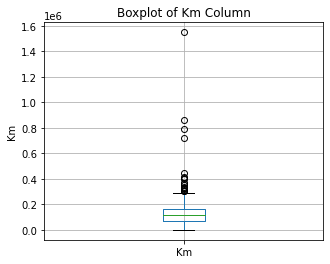

In [40]:
df['Km'] = df['Km'].replace(['לא מוגדר', 'None'], np.nan)
df['Km'] = df['Km'].astype(str).str.replace(',', '').astype(float)
pd.options.display.float_format = '{:.2f}'.format
print(str(df['Km'].describe().transpose()))
plt.figure(figsize=(5, 4))  
df.boxplot(column='Km')
plt.title('Boxplot of Km Column')
plt.ylabel('Km')
plt.show()

We can see that there are outliers.                                                                          
Assuming that a car cannot drive more than 30K km per year, we noticed people's errors when typing the data that additional '0' was added. Also, under 10K total Km can be a mistake also, so we will replace that with Nan and fill with the median values by Year and Hand. 

In [41]:
# for values under 1000, multiply by 1000 (195K=195,000)
df['Km'] = df['Km'].apply(lambda x: x * 1000 if pd.notna(x) and x < 1000 else x)
# Replacing values under 10K that can be mistake to nan
df['Km'] = df['Km'].apply(lambda x: np.nan if pd.notna(x) and x < 10000 else x)
# Replacing outliers with NaN based on year (more or less than 3*STD)
mean_km = df['Km'].mean()
std_km = df['Km'].std()
UCL = mean_km + 2 * std_km
LCL = max(0,mean_km - 2 * std_km) 
df['Km'] = df['Km'].apply(lambda x: np.nan if pd.notna(x) and (x > UCL or x < LCL) else x)

print("Missing values: " + str(df['Km'].isnull().sum()))
print("Percentage of missing values: " + str(round(100 * df['Km'].isnull().sum() / len(df['Km']), 2)) + "%")
missing_km = df[df['Km'].isnull()]
missing_km

Missing values: 128
Percentage of missing values: 9.33%


,manufactor,Year,model,Hand,Gear,capacity_Engine,Engine_type,Prev_ownership,Curr_ownership,Price,Description,Km,model_english,manufactor_GOV,Supply_score
8,מרצדס,2015,220,1,אוטומטית,2200,דיזל,חדש,חברה,70000.00,"[""מונית לשעבר.רכב שמור ומטופל ,הוחלף מנוע יש ח...",NaN,220,מרצדס,443.00
9,ב.מ.וו,2003,525,3,אוטומטית,2500,דיזל,פרטית,פרטית,45000.00,"['רכב מיבוא אישי, במצב מעולם.\r\nהרכב עם תוכנה...",NaN,525I,ב מ וו,1178.00
12,סוזוקי,2008,סוויפט,3,אוטומטית,1500,בנזין,פרטית,פרטית,19500.00,['רכב שמור צבע חדש'],NaN,SWIFT,סוזוקי,5211.00
17,טויוטה,2015,קורולה,2,אוטומטית,1600,בנזין,פרטית,פרטית,62000.00,"['טויוטה קורולה 2015 Sun אוט\' 1.6 (132 כ""ס) א...",NaN,COROLLA,טויוטה,11124.00
52,מרצדס,2023,E-CLASS,4,אוטומטית,2500,בנזין,חברה,פרטית,86000.00,"['לנקות את קארפקס! מיילים נמוכים במיוחד!!\n\n""...",NaN,E CLASS,מרצדס,-1045.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,סובארו,2012,B4,2,אוטומטית,2000,בנזין,פרטית,פרטית,24900.00,['לבוא לקחת. התחייבות לקנייה חוזרת עד 5 שנים. ...,NaN,B4,סובארו,506.00
1326,אופל,2014,קורסה,2,אוטומטית,1400,בנזין,פרטית,פרטית,26900.00,['לבוא לקחת... התחייבות מלאה בבדיקת הקניה לגיר...,NaN,CORSA,אופל,739.00
1336,מיצובישי,2012,לנסר ה,3,אוטומטית,<NA>,בנזין,פרטית,פרטית,25500.00,['רכב שמור ומטופלטסט לשנה '],NaN,LANCER,מיצובישי,898.00
1359,סקודה,2015,אוקטביה,2,אוטומטית,1200,בנזין,פרטית,פרטית,59900.00,['לבוא לקחת התחייבות מלאה בבדיקת הקניה לגיר מנ...,NaN,OCTAVIA,סקודה,6711.00


In [42]:
grouped_data = df.groupby(['Year', 'Hand'])['Km'].median().reset_index()
df = pd.merge(df, grouped_data, on=['Year', 'Hand'], how='left', suffixes=('', '_median'))
df['Km'].fillna(df['Km_median'], inplace=True)
grouped_data2 = df.groupby('Year')['Km'].median().reset_index()
df = pd.merge(df, grouped_data2, on=['Year'], how='left', suffixes=('', '_median2'))
df['Km'].fillna(df['Km_median2'], inplace=True)
df.drop(columns=['Km_median','Km_median2'], inplace=True)
df['Km'] = df['Km'].astype(str).str.replace(',', '').astype(float)
df = df.dropna(axis = 0,subset = ['Km'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368 entries, 0 to 1371
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufactor       1368 non-null   object 
 1   Year             1368 non-null   int64  
 2   model            1368 non-null   object 
 3   Hand             1368 non-null   int64  
 4   Gear             1366 non-null   object 
 5   capacity_Engine  1342 non-null   Int64  
 6   Engine_type      1363 non-null   object 
 7   Prev_ownership   1368 non-null   object 
 8   Curr_ownership   1368 non-null   object 
 9   Price            1368 non-null   float64
 10  Description      1368 non-null   object 
 11  Km               1368 non-null   float64
 12  model_english    1368 non-null   object 
 13  manufactor_GOV   1368 non-null   object 
 14  Supply_score     1368 non-null   float64
dtypes: Int64(1), float64(3), int64(2), object(9)
memory usage: 172.3+ KB


### The 'Engine_type' column:


In [43]:
df['Engine_type'].value_counts()

בנזין         1216
דיזל            50
היבריד          35
היברידי         27
גז              24
טורבו דיזל       8
חשמלי            3
Name: Engine_type, dtype: int64

In [44]:
df['Engine_type'] = df['Engine_type'].replace('None',np.nan)
df['Engine_type'] = df['Engine_type'].replace('לא מוגדר',np.nan)
df['Engine_type'] = df['Engine_type'].replace('היבריד','היברידי')
print("Missing values: "+ str(df['Engine_type'].isnull().sum()))
print("Percentage of missing values: "+str(round(100 * df['Engine_type'].isnull().sum() / len(df['Engine_type']),2))+"%")

Missing values: 5
Percentage of missing values: 0.37%


Because this is very small amount of rows with missing values, we will drop the missing value rows.

In [45]:
df = df.dropna(axis = 0,subset = ['Engine_type'])

### The capacity_Engine column:

count    1337.00
mean     1653.65
std       853.80
min        13.00
25%      1250.00
50%      1500.00
75%      1800.00
max     15000.00
Name: capacity_Engine, dtype: float64


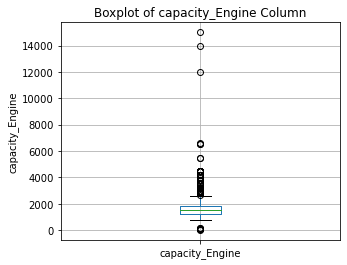

In [46]:
print(df['capacity_Engine'].describe())
# Plot boxplot for 'capacity_Engine'
plt.figure(figsize=(5, 4))  
df.boxplot(column='capacity_Engine')
plt.title('Boxplot of capacity_Engine Column')
plt.ylabel('capacity_Engine')
plt.show()

In [47]:
df['capacity_Engine'] = df['capacity_Engine'].apply(lambda x: x / 10 if pd.notna(x) and x > 10000 else x)

# Calculate the median capacity_Engine for each model
df['mean_capacity'] = df.groupby('model_english')['capacity_Engine'].transform(lambda x: x.mean() if x.notnull().any() else np.nan)

# Calculate the standard deviation for each model 
df['std_capacity'] = df.groupby('model_english')['capacity_Engine'].transform(lambda x: x.std() if x.notnull().any() else np.nan)
df['std_capacity']=df['std_capacity'].replace(np.nan, 0)
# confidence interval
condition = (df['capacity_Engine'] < df['mean_capacity'] - 2 * df['std_capacity']) | \
            (df['capacity_Engine'] > df['mean_capacity'] + 2 * df['std_capacity']) | \
            (df['capacity_Engine'] < 800)

filtered_rows = df[condition]
filtered_rows

,manufactor,Year,model,Hand,Gear,capacity_Engine,Engine_type,Prev_ownership,Curr_ownership,Price,Description,Km,model_english,manufactor_GOV,Supply_score,mean_capacity,std_capacity
3,טויוטה,2016,אוריס,1,טיפטרוניק,1600,בנזין,חדש,פרטית,63000.00,['אוטו במצב חדש!! שמור בקנאות!! נהג יחיד מטופל...,27300.00,AURIS,טויוטה,343.00,1780.00,63.25
11,קיה,2013,פורטה,4,אוטומטית,1500,בנזין,פרטית,פרטית,22000.00,['רכב נוח במיוחד במצב מציון שמור ומתוחזק מאוד ...,199000.00,FORTE,קיה,2556.00,1585.93,35.37
42,סקודה,2018,אוקטביה,2,אוטומטית,2000,דיזל,מונית,פרטית,50000.00,"['סקודה אוקטביה 2018 מונית שעבר 155,000 ק״מ הר...",155000.00,OCTAVIA,סקודה,5249.00,1343.40,308.89
81,אאודי,2009,A4,3,אוטומטית,2000,בנזין,פרטית,פרטית,40000.00,"['211כ""ס &lt;br/&gt;&lt;br/&gt;פירוט:&lt;br/&g...",244000.00,A4,אאודי,170.00,1828.00,75.85
155,הונדה,2018,CIVIC,2,אוטומטית,1000,בנזין,ליסינג,פרטית,75000.00,"[""רכב נוח ובטיחותי מאוד על הכביש. הרכב ניראה מ...",118000.00,CIVIC,הונדה,2310.00,1692.78,221.49
166,סוזוקי,2007,SX4,3,ידנית,2000,דיזל,פרטית,פרטית,30000.00,['None'],174500.00,SX4,סוזוקי,0.00,1565.89,153.25
185,פולקסווגן,2008,גולף,3,אוטומטית,2000,בנזין,פרטית,פרטית,20000.00,['רכב מצב מציון עשיתי לו טיפול לפנה 8 אלף קילו...,188000.00,GOLF,פולקסווגן,1903.00,1434.06,169.53
207,קיה,2012,ריו,2,אוטומטית,900,בנזין,פרטית,פרטית,20000.00,['קיה מגניבה .מזגן מקפיא.נמכר עקב קבלת רכב מהע...,230000.00,RIO,קיה,2249.00,1336.88,176.53
230,טויוטה,2019,קורולה,2,אוטומטית,1800,היברידי,ליסינג,פרטית,85000.00,"['גמיש לרציניים 155000 ק""מ שמור ומטופל בזמן,חל...",155000.00,COROLLA,טויוטה,393.00,1604.22,29.85
269,סיטרואן,2009,C4,1,רובוטית,1997,בנזין,חדש,פרטית,20000.00,['כמו חדש!'],122000.00,C4,סיטרואן,804.00,1435.82,265.24


In [48]:
filtered_indices = filtered_rows.index
df.loc[filtered_indices, 'capacity_Engine'] = np.nan
# Group by 'model' and calculate the median
df['capacity_Engine'] = pd.to_numeric(df['capacity_Engine'], errors='coerce')
grouped_data = df.groupby(['model'])['capacity_Engine'].median().reset_index()
grouped_data.rename(columns={'capacity_Engine': 'capacity_Engine_median'}, inplace=True)
# Merge
df = pd.merge(df, grouped_data, on='model', how='left')
# Fill NaN values in 'capacity_Engine' with the median values
df['capacity_Engine'].fillna(df['capacity_Engine_median'], inplace=True)
df.drop(columns=['capacity_Engine_median','std_capacity','mean_capacity'], inplace=True)
df.dropna(axis=0, subset=['capacity_Engine'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1354 entries, 0 to 1362
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufactor       1354 non-null   object 
 1   Year             1354 non-null   int64  
 2   model            1354 non-null   object 
 3   Hand             1354 non-null   int64  
 4   Gear             1352 non-null   object 
 5   capacity_Engine  1354 non-null   float64
 6   Engine_type      1354 non-null   object 
 7   Prev_ownership   1354 non-null   object 
 8   Curr_ownership   1354 non-null   object 
 9   Price            1354 non-null   float64
 10  Description      1354 non-null   object 
 11  Km               1354 non-null   float64
 12  model_english    1354 non-null   object 
 13  manufactor_GOV   1354 non-null   object 
 14  Supply_score     1354 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 169.2+ KB


### The Gear column:

In [49]:
df['Gear'].value_counts()

אוטומטית     1213
ידנית          71
טיפטרוניק      37
רובוטית        31
Name: Gear, dtype: int64

In [50]:
print("Missing values: "+ str(df['Gear'].isnull().sum()))
print("Percentage of missing values: "+str(round(100 * df['Gear'].isnull().sum() / len(df['Gear']),2))+"%")

Missing values: 2
Percentage of missing values: 0.15%


We will fill the missing values from the 'Descreption' if it contains: 'רובוטית','ידנית',אוטומטית','טיפטרוניק'

In [51]:
df.loc[pd.isna(df['Gear']) & df['Description'].str.contains('רובוטית', na=False), 'Gear'] = 'רובוטית'
df.loc[pd.isna(df['Gear']) & df['Description'].str.contains('טיפטרוניק', na=False), 'Gear'] = 'טיפטרוניק'
df.loc[pd.isna(df['Gear']) & df['Description'].str.contains('ידנית', na=False), 'Gear'] = 'ידנית'
df.loc[pd.isna(df['Gear']) & df['Description'].str.contains('אוטומטית', na=False), 'Gear'] = 'אוטומטית'
df.loc[pd.isna(df['Gear']) & df['Description'].str.contains('אוטומטית', na=False), 'Gear'] = 'אוטומט'
print("Percentage of missing values after filling: "+str(round(100 * df['Gear'].isnull().sum() / len(df['Gear']),2))+"%")

Percentage of missing values after filling: 0.15%


Because this is very small amount of rows with missing values, we will drop the missing value rows.

In [52]:
df = df.dropna(axis = 0,subset = ['Gear'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 0 to 1362
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufactor       1352 non-null   object 
 1   Year             1352 non-null   int64  
 2   model            1352 non-null   object 
 3   Hand             1352 non-null   int64  
 4   Gear             1352 non-null   object 
 5   capacity_Engine  1352 non-null   float64
 6   Engine_type      1352 non-null   object 
 7   Prev_ownership   1352 non-null   object 
 8   Curr_ownership   1352 non-null   object 
 9   Price            1352 non-null   float64
 10  Description      1352 non-null   object 
 11  Km               1352 non-null   float64
 12  model_english    1352 non-null   object 
 13  manufactor_GOV   1352 non-null   object 
 14  Supply_score     1352 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 169.0+ KB


In [54]:
df=df.drop(['Description'],axis=1)
df.rename(columns={'Supply_score_All': 'Supply_score'}, inplace=True)

### The Reliability of The Price
This process uses confidence interval (with 2*STD) which helps in validating and refining the 'Price' column by identifying and removing data points that deviate significantly from expected values based on car model and year, as we can see in the correlation below (in the corraltion section), these features has the most significant impact on the price.

In [55]:

def remove_price_outliers(df):
    # Calculate the mean and standard deviation price for each model
    df['model_mean_price'] = df.groupby('model')['Price'].transform(lambda x: x.mean() if x.notnull().any() else np.nan)
    df['model_std_Price'] = df.groupby('model')['Price'].transform(lambda x: x.std() if x.notnull().any() else np.nan)
    df['model_std_Price'] = df['model_std_Price'].replace(np.nan, 0)
    
    # Identify outliers based on model price
    condition_model = (df['Price'] < df['model_mean_price'] - 2 * df['model_std_Price']) | \
                      (df['Price'] > df['model_mean_price'] + 2 * df['model_std_Price'])
    outliers_rows_by_model = df[condition_model]
    
    # Calculate the mean and standard deviation price for each year
    df['year_mean_price'] = df.groupby('Year')['Price'].transform(lambda x: x.mean() if x.notnull().any() else np.nan)
    df['year_std_Price'] = df.groupby('Year')['Price'].transform(lambda x: x.std() if x.notnull().any() else np.nan)
    df['year_std_Price'] = df['year_std_Price'].replace(np.nan, 0)
    
    # Identify outliers based on year price
    condition_year = (df['Price'] < df['year_mean_price'] - 2 * df['year_std_Price']) | \
                     (df['Price'] > df['year_mean_price'] + 2 * df['year_std_Price'])
    outliers_rows_by_year = df[condition_year]
    
    # Find common outliers in both model and year conditions
    common_outliers = outliers_rows_by_model.index.intersection(outliers_rows_by_year.index)
    common_outliers_df = df.loc[common_outliers]
    
    # Drop common outliers from the original dataframe
    df = df.drop(common_outliers_df.index)
    
    # Drop temporary columns and rows with missing 'Price'
    df.drop(columns=['year_mean_price', 'year_std_Price', 'model_std_Price', 'model_mean_price'], inplace=True)
    df.dropna(subset=['Price'], inplace=True)
    
    return df


In [56]:
df = remove_price_outliers(df)
df

,manufactor,Year,model,Hand,Gear,capacity_Engine,Engine_type,Prev_ownership,Curr_ownership,Price,Km,model_english,manufactor_GOV,Supply_score
0,יונדאי,2015,I35,2,אוטומטית,1600.00,בנזין,פרטית,פרטית,51000.00,144000.00,I35,יונדאי,6836.00
1,ניסאן,2018,מיקרה,1,אוטומטית,1200.00,בנזין,חדש,פרטית,49000.00,69000.00,MICRA,ניסאן,4939.00
2,סוזוקי,2010,סוויפט,1,אוטומטית,1450.00,בנזין,חדש,פרטית,22500.00,145000.00,SWIFT,סוזוקי,1906.00
3,טויוטה,2016,אוריס,1,טיפטרוניק,1800.00,בנזין,חדש,פרטית,63000.00,27300.00,AURIS,טויוטה,343.00
4,קיה,2012,פיקנטו,1,אוטומטית,1248.00,בנזין,חדש,פרטית,37000.00,70000.00,PICANTO,קיה,3781.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,סקודה,2016,אוקטביה,2,אוטומטית,1400.00,בנזין,פרטית,פרטית,60000.00,180000.00,OCTAVIA,סקודה,8105.00
1359,אלפא רומיאו,2013,ג'ולייטה,4,ידנית,1400.00,בנזין,פרטית,פרטית,45000.00,160000.00,ALFA GIULIETTA,אלפא רומיאו,265.00
1360,סקודה,2014,ראפיד,1,אוטומטית,1400.00,בנזין,חדש,פרטית,30000.00,128000.00,RAPID,סקודה,2173.00
1361,ניסאן,2011,ג'וק JUKE,3,אוטומטית,1600.00,בנזין,פרטית,פרטית,28000.00,118000.00,JUKE,ניסאן,2933.00


---
<a id='section1'></a>
# Functions Section

In [57]:
def replace_values(df):
    # manufactor column
    df['manufactor'] = df['manufactor'].replace('Lexsus','לקסוס')
    
    # model column
    df['model'] = df['model'].str.upper()
    df = replace_hebrew_in_model(df)
    df['model'] = df['model'].str.replace('`', "'")
    df['model'] = df['model'].str.replace('קאונטרימן', "קאנטרימן")
    df['model'] = df['model'].apply(remove_before_comma)
    df['model'] = df['model'].apply(remove_after_word)
    df['model'] = df['model'].apply(remove_words)
    df['model'] = df['model'].str.strip()
    
    # Gear column
    df['Gear'] = df['Gear'].replace('אוטומט','אוטומטית')
    df['Gear'] = df['Gear'].replace('לא מוגדר',np.nan)
    df['Gear'] = df['Gear'].replace('None',np.nan)
    
    # capacity_Engine column
    df['capacity_Engine'] = df['capacity_Engine'].replace('nan', np.nan)
    df['capacity_Engine'] = df['capacity_Engine'].replace('לא מוגדר', np.nan)
    df['capacity_Engine'] = df['capacity_Engine'].replace('None', np.nan)
    df['capacity_Engine'] = df['capacity_Engine'].replace(',', '', regex=True)
    df['capacity_Engine'] = df['capacity_Engine'].astype(float).astype('Int64')
    
    # Missing values in supply_score 
    df['model_english'] = df['model'].apply(translate_model)
    df['manufactor_GOV'] = df['manufactor']
    df['manufactor_GOV'] = df['manufactor_GOV'].replace('וולוו','וולבו')
    df['manufactor_GOV'] = df['manufactor_GOV'].replace('מאזדה','מזדה')
    df['manufactor_GOV'] = df['manufactor_GOV'].replace('ב.מ.וו','ב מ וו')
    df['manufactor_GOV'] = df['manufactor_GOV'].replace('מיני','ב מ וו')
    df.loc[(df['manufactor'] == 'מרצדס') & df['Description'].str.contains('S 600', na=False), 'model_english'] = 'S600'
    df.loc[(df['manufactor'] == 'מרצדס') & df['Description'].str.contains('c200', na=False), 'model_english'] = 'C200'
    df.loc[(df['manufactor'] == 'מרצדס') & df['Description'].str.contains('e350', na=False), 'model_english'] = 'E350'
    df.loc[(df['manufactor'] == 'מרצדס') & df['Description'].str.contains('s 550', na=False), 'model_english'] = 'S550'
    df.loc[(df['manufactor'] == 'מרצדס') & df['Description'].str.contains('ml320', na=False), 'model_english'] = 'ML320'
    df.loc[(df['model_english'] == 'SUPERB') & (df['Year'] > 2015), 'model_english'] = 'NEW SUPERB'
    
    # Curr_ownership
    df['Curr_ownership'] = df['Curr_ownership'].replace('לא מוגדר',np.nan)
    df['Curr_ownership'] = df['Curr_ownership'].replace('None',np.nan)
    
    # Prev_ownership 
    df['Prev_ownership'] = df['Prev_ownership'].replace('לא מוגדר',np.nan)
    df['Prev_ownership'] = df['Prev_ownership'].replace('None',np.nan)
    
    # Km column 
    df['Km'] = df['Km'].replace(['לא מוגדר', 'None'], np.nan)
    df['Km'] = df['Km'].astype(str).str.replace(',', '').astype(float)
    
    # Engine_type
    df['Engine_type'] = df['Engine_type'].replace('None',np.nan)
    df['Engine_type'] = df['Engine_type'].replace('לא מוגדר',np.nan)
    df['Engine_type'] = df['Engine_type'].replace('היבריד','היברידי')

    return df

In [58]:
def merge_supply_score_info(supply_info_dict, df):
    # Initialize lists
    manufacturers = []
    models = []
    years = []
    supply_scores = []

    # Iterate over the dictionary
    for (manufacturer, model, year), supply_score in supply_info_dict.items():
        manufacturers.append(manufacturer)
        models.append(model)
        years.append(year)
        supply_scores.append(supply_score)

    # Create DataFrame from lists
    supply_info_df = pd.DataFrame({
        'manufactor_GOV': manufacturers,
        'model': models,
        'Year': years,
        'Supply_score_All': supply_scores
    })

    # Perform the merge with suffixes
    merged_df = df.merge(
        supply_info_df[['manufactor_GOV', 'model', 'Year', 'Supply_score_All']],
        left_on=['manufactor_GOV', 'model_english', 'Year'],
        right_on=['manufactor_GOV', 'model', 'Year'],
        how='left',
        suffixes=('', '_supply')
    )

    return merged_df

In [59]:
def fill_from_description (df):
    df.loc[pd.isna(df['Curr_ownership']) & df['Description'].str.contains('פרטית', na=False), 'Curr_ownership'] = 'פרטית'
    df.loc[pd.isna(df['Curr_ownership']) & df['Description'].str.contains('ליסינג', na=False), 'Curr_ownership'] = 'ליסינג'
    df.loc[pd.isna(df['Curr_ownership']) & df['Description'].str.contains('השכרה', na=False), 'Curr_ownership'] = 'השכרה'
    df.loc[pd.isna(df['Curr_ownership']) & df['Description'].str.contains('חברה', na=False), 'Curr_ownership'] = 'חברה'
    df.loc[pd.isna(df['Curr_ownership']) & df['Description'].str.contains('מונית', na=False), 'Curr_ownership'] = 'מונית'
    df.loc[pd.isna(df['Curr_ownership']) & df['Description'].str.contains('ממשלתי', na=False), 'Curr_ownership'] = 'ממשלתי'
    df.loc[pd.isna(df['Gear']) & df['Description'].str.contains('רובוטית', na=False), 'Gear'] = 'רובוטית'
    df.loc[pd.isna(df['Gear']) & df['Description'].str.contains('טיפטרוניק', na=False), 'Gear'] = 'טיפטרוניק'
    df.loc[pd.isna(df['Gear']) & df['Description'].str.contains('ידנית', na=False), 'Gear'] = 'ידנית'
    df.loc[pd.isna(df['Gear']) & df['Description'].str.contains('אוטומטית', na=False), 'Gear'] = 'אוטומטית'
    df.loc[pd.isna(df['Gear']) & df['Description'].str.contains('אוטומטית', na=False), 'Gear'] = 'אוטומט'    
    return df
    
def fill_missing_ownership (df):
    df['Curr_ownership'].fillna(value='פרטית', inplace=True)
    df.loc[df['Hand'] == 1, 'Prev_ownership'] = 'חדש' 
    df.loc[pd.isna(df['Prev_ownership']) , 'Prev_ownership'] =df['Curr_ownership']    
    return df
    
def fill_km (df):
    # for values under 1000, multiply by 1000 (195K=195,000)
    df['Km'] = df['Km'].apply(lambda x: x * 1000 if pd.notna(x) and x < 1000 else x)
    # Replacing values under 10K that can be mistake to nan
    df['Km'] = df['Km'].apply(lambda x: np.nan if pd.notna(x) and x < 10000 else x)
    # Replacing outliers with NaN based on year (more or less than 3*STD)
    mean_km = df['Km'].mean()
    std_km = df['Km'].std()
    UCL = mean_km + 3 * std_km
    LCL = max(0,mean_km - 3 * std_km) 
    df['Km'] = df['Km'].apply(lambda x: np.nan if pd.notna(x) and (x > UCL or x < LCL) else x)
    grouped_data = df.groupby(['Year', 'Hand'])['Km'].median().reset_index()
    df = pd.merge(df, grouped_data, on=['Year', 'Hand'], how='left', suffixes=('', '_median'))
    df['Km'].fillna(df['Km_median'], inplace=True)
    grouped_data2 = df.groupby('Year')['Km'].median().reset_index()
    df = pd.merge(df, grouped_data2, on=['Year'], how='left', suffixes=('', '_median2'))
    df['Km'].fillna(df['Km_median2'], inplace=True)
    df.drop(columns=['Km_median','Km_median2'], inplace=True)
    df['Km'] = df['Km'].astype(str).str.replace(',', '').astype(float)
    df = df.dropna(axis = 0,subset = ['Km'])
    return df

def fill_capacity_engine (df):
    df['capacity_Engine'] = df['capacity_Engine'].apply(lambda x: x / 10 if pd.notna(x) and x > 10000 else x)
    # Step 1: Calculate the median capacity_Engine for each model where possible
    df['mean_capacity'] = df.groupby('model_english')['capacity_Engine'].transform(lambda x: x.mean() if x.notnull().any() else np.nan)
    # Step 2: Calculate the standard deviation for each model where possible
    df['std_capacity'] = df.groupby('model_english')['capacity_Engine'].transform(lambda x: x.std() if x.notnull().any() else np.nan)
    df['std_capacity']=df['std_capacity'].replace(np.nan, 0)
    # Step 3: Adjust capacity_Engine values where possible
    condition = (df['capacity_Engine'] < df['mean_capacity'] - 3 * df['std_capacity']) | \
                (df['capacity_Engine'] > df['mean_capacity'] + 3 * df['std_capacity']) | \
                (df['capacity_Engine'] < 800)
    filtered_rows = df[condition]
    filtered_indices = filtered_rows.index
    df.loc[filtered_indices, 'capacity_Engine'] = np.nan
    # Group by 'model' and calculate the median
    df['capacity_Engine'] = pd.to_numeric(df['capacity_Engine'], errors='coerce')
    grouped_data = df.groupby(['model'])['capacity_Engine'].median().reset_index()
    grouped_data.rename(columns={'capacity_Engine': 'capacity_Engine_median'}, inplace=True)
    # Merge to get the median value back into the original DataFrame
    df = pd.merge(df, grouped_data, on='model', how='left')
    # Fill NaN values in 'capacity_Engine' with the median values
    df['capacity_Engine'].fillna(df['capacity_Engine_median'], inplace=True)
    # Drop the temporary median column
    df.drop(columns=['capacity_Engine_median','std_capacity','mean_capacity'], inplace=True)
    # Drop rows where 'capacity_Engine' is still NaN
    df.dropna(axis=0, subset=['capacity_Engine'], inplace=True)
    return df

---
<a id='section3'></a>
# Prepare The Train Set Data
In this section you can put your test set data to prepare and check the model preformance 

In [60]:
Test_data = pd.read_csv("dataset.csv") ## enter your test data here

def prepare_data(df):
    
    df.drop_duplicates(inplace=True) # Remove duplicate rows
    df = df.drop(['Area','City','Pic_num','Cre_date','Repub_date','Color'],axis = 1) # drop columns that are not required for the prediction
    df = replace_values(df) # replace unwanted values
    supply_info_dict, not_found_count = get_supply_info_dict(manufacturer_model_dict) # Returns dictionary of the supply score from the web scraping 
    df = merge_supply_score_info (supply_info_dict,df) # adds to the df the founded supply score
    df, results, y_test, X_test, best_model_name, best_pipeline = fill_missing_supply_scores(df) # filling the missing values of the supply score by using the best prediction model
    df.drop('Test', axis=1, inplace=True) # drop 'test' column due to large amount of missing values
    df = fill_from_description(df) # fiil missing values if they are in the description
    df= fill_missing_ownership(df) # fill missing values in the cuur_ownership and prev_ownership based on the the described logic
    df = fill_km (df) # prepare the KM column 
    df = df.dropna(axis = 0,subset = ['Engine_type'])
    df = fill_capacity_engine(df) # prepare the capacity_Engine column 
    df = df.dropna(axis = 0,subset = ['Gear'])
    df = df.drop(['Description','Supply_score','manufactor_GOV','model_supply','model'],axis=1)
    df = df.rename(columns={'Supply_score_All': 'Supply_score'})
    df = df.rename(columns={'model_english': 'model'})
    df.drop_duplicates(inplace=True)
    df = remove_price_outliers(df) # remove price outliers base on the highest corralted features (uses the heatmap corrolation)
    return df

df= prepare_data(Test_data)


In [61]:
df.reset_index(drop=True, inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufactor       1241 non-null   object 
 1   Year             1241 non-null   int64  
 2   Hand             1241 non-null   int64  
 3   Gear             1241 non-null   object 
 4   capacity_Engine  1241 non-null   float64
 5   Engine_type      1241 non-null   object 
 6   Prev_ownership   1241 non-null   object 
 7   Curr_ownership   1241 non-null   object 
 8   Price            1241 non-null   float64
 9   Km               1241 non-null   float64
 10  model            1241 non-null   object 
 11  Supply_score     1241 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 116.5+ KB


,manufactor,Year,Hand,Gear,capacity_Engine,Engine_type,Prev_ownership,Curr_ownership,Price,Km,model,Supply_score
0,יונדאי,2015,2,אוטומטית,1600.00,בנזין,פרטית,פרטית,51000.00,144000.00,I35,6836.00
1,ניסאן,2018,1,אוטומטית,1200.00,בנזין,חדש,פרטית,49000.00,69000.00,MICRA,4939.00
2,סוזוקי,2010,1,אוטומטית,1450.00,בנזין,חדש,פרטית,22500.00,145000.00,SWIFT,1906.00
3,טויוטה,2016,1,טיפטרוניק,1600.00,בנזין,חדש,פרטית,63000.00,27300.00,AURIS,343.00
4,קיה,2012,1,אוטומטית,1248.00,בנזין,חדש,פרטית,37000.00,70000.00,PICANTO,3781.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1236,סקודה,2016,2,אוטומטית,1400.00,בנזין,פרטית,פרטית,60000.00,180000.00,OCTAVIA,8105.00
1237,אלפא רומיאו,2013,4,ידנית,1400.00,בנזין,פרטית,פרטית,45000.00,160000.00,ALFA GIULIETTA,265.00
1238,סקודה,2014,1,אוטומטית,1400.00,בנזין,חדש,פרטית,30000.00,128000.00,RAPID,2173.00
1239,ניסאן,2011,3,אוטומטית,1600.00,בנזין,פרטית,פרטית,28000.00,118000.00,JUKE,2933.00


---
<a id='section4'></a>
# Encoding  and  Correlation
###  Target Encoding

In [62]:
df_corr = df.copy()
print("nunique values in manufactor: "+str(df_corr['manufactor'].nunique()))
print("nunique values in model: "+str(df_corr['model'].nunique()))
print("nunique values in Gear: "+str(df['Gear'].nunique()))
print("nunique values in Prev_ownership: "+str(df_corr['Prev_ownership'].nunique()))
print("nunique values in Curr_ownership: "+str(df_corr['Curr_ownership'].nunique()))
print("nunique values in Engine_type: "+str(df_corr['Engine_type'].nunique()))

nunique values in manufactor: 26
nunique values in model: 209
nunique values in Gear: 4
nunique values in Prev_ownership: 8
nunique values in Curr_ownership: 6
nunique values in Engine_type: 6


In [63]:
df_corr.columns

Index(['manufactor', 'Year', 'Hand', 'Gear', 'capacity_Engine', 'Engine_type',
       'Prev_ownership', 'Curr_ownership', 'Price', 'Km', 'model',
       'Supply_score'],
      dtype='object')

We used several ways to encode the categorial features:     
**Target mean encoding** (or target encoding) is a technique where categorical variables are encoded based on the mean of the target variable (in this case, 'Price') for each category.           
**Binning encoding** is the process of converting continuous numerical data into discrete categories (bins) and then encoding these bins.

In [64]:
# Target mean encoding
df_corr['manufactor_encoded'] = df_corr['manufactor'].map(df_corr.groupby('manufactor')['Price'].mean()) 
df_corr['car_model_encoded'] = df_corr['model'].map(df_corr.groupby('model')['Price'].mean()) 
df_corr['gear_encoded'] = df_corr['Gear'].map(df_corr.groupby('Gear')['Price'].mean()) 
df_corr['Engine_type_encoded'] = df_corr['Engine_type'].map(df_corr.groupby('Engine_type')['Price'].mean()) 
df_corr['prev_encoded'] = df_corr['Prev_ownership'].map(df_corr.groupby('Prev_ownership')['Price'].mean()) 
df_corr['curr_encoded'] = df_corr['Curr_ownership'].map(df_corr.groupby('Curr_ownership')['Price'].mean())  
   
# # Binning and encoding 
bins = [0, 50000, 100000, 150000, 200000, float('inf')] 
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+'] 
df_corr['km_binned'] = pd.cut(df_corr['Km'], bins=bins, labels=labels) 
df_corr['km_encoded'] = df_corr['km_binned'].map(df_corr.groupby('km_binned')['Price'].mean())  

# Drop the original columns after encoding 
df_corr = df_corr.drop(['manufactor','model', 'Prev_ownership', 'Curr_ownership', 'Gear', 'Engine_type', 'Km','km_binned'], axis=1) 
df_corr = df_corr.rename(columns={'km_encoded': 'Km'}) # 
df_corr = df_corr.rename(columns={'hand_encoded': 'Hand'}) 
df_corr['Km'] = df_corr['Km'].astype(float)
df_corr.info()
df_corr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1241 non-null   int64  
 1   Hand                 1241 non-null   int64  
 2   capacity_Engine      1241 non-null   float64
 3   Price                1241 non-null   float64
 4   Supply_score         1241 non-null   float64
 5   manufactor_encoded   1241 non-null   float64
 6   car_model_encoded    1241 non-null   float64
 7   gear_encoded         1241 non-null   float64
 8   Engine_type_encoded  1241 non-null   float64
 9   prev_encoded         1241 non-null   float64
 10  curr_encoded         1241 non-null   float64
 11  Km                   1241 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 116.5 KB


,Year,Hand,capacity_Engine,Price,Supply_score,manufactor_encoded,car_model_encoded,gear_encoded,Engine_type_encoded,prev_encoded,curr_encoded,Km
0,2015,2,1600.00,51000.00,6836.00,59894.06,44000.00,52310.73,50061.75,46867.77,50665.59,51764.02
1,2018,1,1200.00,49000.00,4939.00,47581.25,42076.92,52310.73,50061.75,60793.37,50665.59,60480.70
2,2010,1,1450.00,22500.00,1906.00,48959.38,39384.62,52310.73,50061.75,60793.37,50665.59,51764.02
3,2016,1,1600.00,63000.00,343.00,65907.44,62350.00,48279.41,50061.75,60793.37,50665.59,69554.17
4,2012,1,1248.00,37000.00,3781.00,52406.91,50886.34,52310.73,50061.75,60793.37,50665.59,60480.70
...,...,...,...,...,...,...,...,...,...,...,...,...
1236,2016,2,1400.00,60000.00,8105.00,48529.91,53353.33,52310.73,50061.75,46867.77,50665.59,38825.49
1237,2013,4,1400.00,45000.00,265.00,48374.88,60200.00,37063.22,50061.75,46867.77,50665.59,38825.49
1238,2014,1,1400.00,30000.00,2173.00,48529.91,39000.00,52310.73,50061.75,60793.37,50665.59,51764.02
1239,2011,3,1600.00,28000.00,2933.00,47581.25,44875.00,52310.73,50061.75,46867.77,50665.59,51764.02


The purpose of correlation analysis, especially when building prediction models like for car prices, is to understand how variables relate to each other and to the target variable. It helps select influential features for accurate prediction models by showing which factors move prices together (positive correlation) or oppositely (negative correlation), aiding in pricing and valuation decisions.

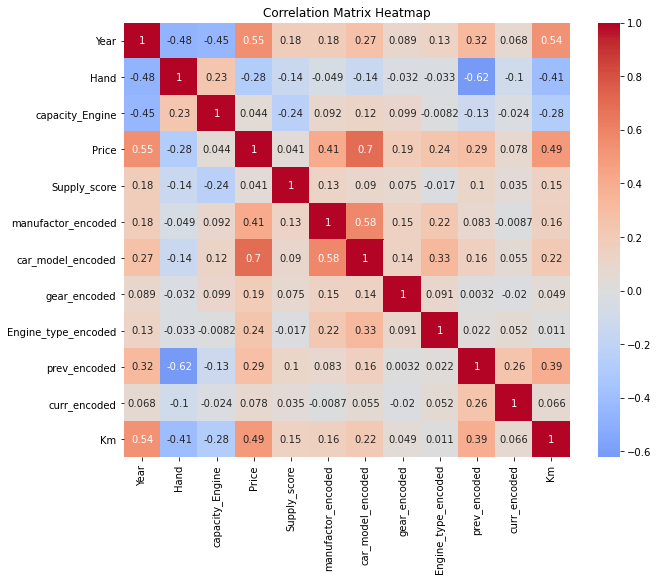

In [65]:
# Calculate the Pearson correlation matrix
corr_matrix = df_corr.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

---
<a id='section5'></a>
# Price Prediction by ElasticNet

Fitting 10 folds for each of 42 candidates, totalling 420 fits
Best Alpha: 0.01
Best L1 Ratio: 0.1
RMSE for the best model: 10696.462426790822
Mean Absolute Error (MAE): 8167.551404086522
R^2 Score: 0.7682098890896066


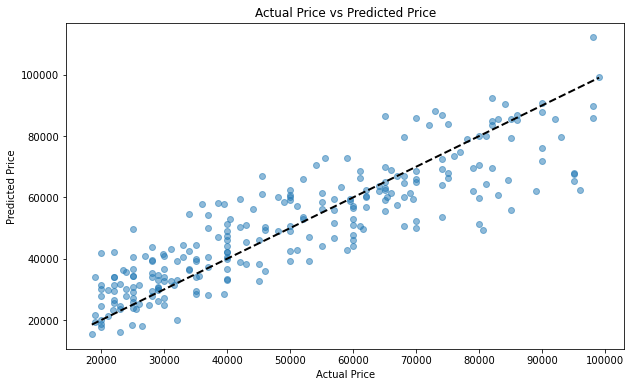

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.pipeline import Pipeline

# define RMSE Scoring Function for Grid Search
rmse_scorer = make_scorer(lambda estimator, X, y: np.sqrt(mean_squared_error(y, estimator.predict(X))), greater_is_better=False)

X = df_corr.drop('Price', axis=1) #features
y = df_corr['Price'] #target

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)), # we increased the degree of the model for better preformance 
    ('scaler', RobustScaler()), # making it robust to outliers.
    ('elastic_net', ElasticNet(max_iter=20000, random_state=42))
])

# parameter grid for Grid Search- These values are chosen to explore a range of model complexities and regularization behaviors during the hyperparameter tuning process.
param_grid = {
    'elastic_net__alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],  # Regularization strength
    'elastic_net__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],  # Balance between L1 and L2 regularization
}

# setup GridSearchCV with 10-Fold Cross-Validation and RMSE Scoring
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, scoring=rmse_scorer)

# fit the model
grid_search.fit(X_train, y_train)

# get the best model from GridSearchCV
best_model = grid_search.best_estimator_
print(f"Best Alpha: {grid_search.best_params_['elastic_net__alpha']}")
print(f"Best L1 Ratio: {grid_search.best_params_['elastic_net__l1_ratio']}")

# predict on the test set
y_pred = best_model.predict(X_test)

# set predictions to be non-negative
y_pred = np.maximum(y_pred, 0)

# calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE for the best model: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

# plot predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [67]:
# Print the DataFrame with all columns from the original df, actual values, and predicted values
X_test = X_test.copy() 
X_test.loc[:, 'Actual'] = y_test.values
X_test.loc[:, 'Predicted'] = y_pred
X_test

,Year,Hand,capacity_Engine,Supply_score,manufactor_encoded,car_model_encoded,gear_encoded,Engine_type_encoded,prev_encoded,curr_encoded,Km,Actual,Predicted
916,2012,3,2000.00,61.00,58543.35,52000.00,52310.73,50061.75,46867.77,50665.59,60480.70,52000.00,53539.87
86,2016,3,1600.00,361.00,45940.54,43180.00,52310.73,44990.32,46867.77,50665.59,34741.71,28000.00,43952.30
247,2015,2,1400.00,2769.00,52406.91,31933.33,52310.73,50061.75,46867.77,50665.59,38825.49,29000.00,30401.61
355,2014,2,1600.00,12448.00,65907.44,63255.79,52310.73,50061.75,46867.77,50665.59,51764.02,62000.00,56767.54
618,2014,2,1400.00,2173.00,48529.91,39000.00,52310.73,50061.75,46867.77,50665.59,38825.49,30000.00,33903.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2009,3,1600.00,6439.00,59894.06,41877.78,52310.73,50061.75,46867.77,50665.59,38825.49,21900.00,23152.53
96,2015,3,1500.00,6824.00,34595.90,38949.95,52310.73,50061.75,50665.42,50665.59,38825.49,36999.00,37306.03
578,2009,2,3471.00,2002.00,44961.63,45000.00,52310.73,50061.75,46867.77,50665.59,38825.49,45000.00,46043.42
1236,2016,2,1400.00,8105.00,48529.91,53353.33,52310.73,50061.75,46867.77,50665.59,38825.49,60000.00,45937.19


---
<a id='section6'></a>
# Feature Importances


Top 5 Features Based on Importance:
                                Feature  Coefficient  Absolute Coefficient
33         capacity_Engine gear_encoded     -9516.08               9516.08
30         capacity_Engine Supply_score      8559.52               8559.52
34  capacity_Engine Engine_type_encoded      7771.03               7771.03
25                    Hand gear_encoded     -7762.45               7762.45
16                    Year gear_encoded      6288.89               6288.89


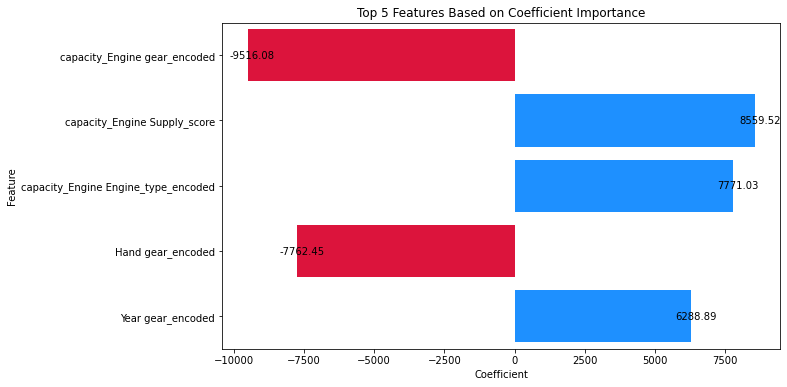

In [68]:
# feature names and coefficients
poly = best_model.named_steps['poly']
# feature_names = poly.get_feature_names_out(input_features=X.columns) # change the code based on your packege version
feature_names = poly.get_feature_names(input_features=X.columns)
coefficients = best_model.named_steps['elastic_net'].coef_

# create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importances['Absolute Coefficient'] = feature_importances['Coefficient'].abs()
feature_importances = feature_importances.sort_values(by='Absolute Coefficient', ascending=False)

# display top 5 features based on importance
print("\nTop 5 Features Based on Importance:")
print(feature_importances.head(5))

# plot feature importances
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Coefficient', y='Feature', data=feature_importances.head(5))
for p in ax.patches:
    coefficient = p.get_width()
    ax.annotate(f'{coefficient:.2f}', 
                (coefficient, p.get_y() + p.get_height() / 2), 
                ha='center', va='center', fontsize=10, color='black', xytext=(5, 0), 
                textcoords='offset points')
    if coefficient < 0:
        p.set_facecolor('crimson')
    else:
        p.set_facecolor('dodgerblue')

plt.title('Top 5 Features Based on Coefficient Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


These coefficients reveal how different combinations of features impact the predicted car price in our model.         
**Positive** coefficients indicate features that tend to increase prices, while **negative** coefficients indicate features associated with lower prices.